## Importacion liberias

In [1]:
!pip install torch numpy pandas matplotlib scikit-learn transformers datasets torcheval accelerate

**Importación librerias**

In [1]:
import torch.nn as nn
import torch
#from torch.utils.data import Dataset, DataLoader
import os
import re
import sys
import json
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import datasets as ds
import matplotlib.pyplot as plt
from datetime import datetime, timezone
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoConfig, EarlyStoppingCallback
)
from transformers.integrations import TensorBoardCallback
from transformers import EvalPrediction
from sklearn.metrics import f1_score, recall_score, precision_score
from torcheval.metrics import MulticlassAccuracy
from typing import Dict, List, Tuple, Union, Optional, Callable, ClassVar
from typing import ClassVar
from datasets import DatasetDict, load_dataset
from sklearn.model_selection import train_test_split
import ppscore as pps
from transformers import DataCollatorWithPadding
from IPython.display import display, clear_output, update_display
from tqdm.notebook import tqdm
from IPython.display import display, clear_output
from dataclasses import dataclass, field
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
# NLP
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

# Para habilitar la depuración de errores CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# API KEYS IMPORT
load_dotenv()
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Versiones, información del sistema y del device

In [2]:
print(sys.executable)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"Device name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
print(torch.cuda.get_arch_list())

# sys, library info
print("Operating System:", os.name)
print("Platform:", sys.platform)
print("Current Working Directory:", os.getcwd())
print("Environment Variables:", os.environ)
print("Python Version:", sys.version)
print("Command-line arguments:", sys.argv)
print(ds.__version__)

c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Scripts\python.exe
PyTorch version: 2.3.0+cu118
CUDA available: True
CUDA version: 11.8
Device name: NVIDIA RTX A500 Laptop GPU
['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_90', 'compute_37']
Operating System: nt
Platform: win32
Current Working Directory: c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo
Environment Variables: environ({'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\Jorge\\AppData\\Roaming', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1', 'BRB': 'C:\\Program Files\\HP\\Sure Click\\bin', 'BRS': 'C:\\Program Files\\HP\\Sure Click\\servers', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_9868_PTFXBKCRNJKJEMIO', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'KOKE00', 'COMSPEC': 'C:\\windows\\system32\\cmd.exe', 'CUDA_PATH': 'C:\

In [3]:
"""
# Descomentar para importaciones en google colab 

# Importacion del drive content
from google.colab import drive
drive.mount('/content/drive')

# Importacion de clase propia "Eda" en colab
ruta_modulo_vis_colab = "/content/drive/MyDrive/NLP/code/"
sys.path.append(os.path.abspath(ruta_modulo_vis_colab))
from visualization import Eda

"""

'\n# Descomentar para importaciones en google colab \n\n# Importacion del drive content\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\n# Importacion de clase propia "Eda" en colab\nruta_modulo_vis_colab = "/content/drive/MyDrive/NLP/code/"\nsys.path.append(os.path.abspath(ruta_modulo_vis_colab))\nfrom visualization import Eda\n\n'

In [4]:
# GPU INFO
!nvidia-smi

Mon Jun  3 19:29:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A500 Laptop GPU   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8              5W /   30W |     364MiB /   4096MiB |     37%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# VER SI GPU ESTA DISPONIBLE PARA ENTRENAR
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## **EDA**

In [6]:
# Importacion de clase propia "Eda" en local
sys.path.append(os.path.abspath('./code'))
from visualization import Eda

In [7]:
# Importacion de los datos
ruta_data_colab  = "/content/drive/MyDrive/NLP/data/data_tw.csv"
ruta_data_local = "./data/data_tw.csv"
ruta_data_kaggle = "/kaggle/input/data-tw/data_tw.csv"

df = pd.read_csv(ruta_data_local)
df.drop(columns = 	'Unnamed: 0', inplace = True)

In [8]:
df.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


**Número de muestras de cada clase a predecir**

In [189]:
df["label"].value_counts()

1    10000
0    10000
Name: label, dtype: int64

**Columnas del dataset: features y target**

In [10]:
df.columns

Index(['post_id', 'post_created', 'post_text', 'user_id', 'followers',
       'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

**Número de muestras y número de variables**

In [11]:
df.shape

(20000, 10)

**Añaden etiquetas para clase 0 y 1 de tipo string, las llamaremos 0 -> NEGATIVE Y 1 -> POSITIVE**

In [18]:
labels = {
        0: "NEGATIVE" ,
         1:"POSITIVE"
}
df["label_name"] = df["label"].map(labels)

In [19]:
df.columns

Index(['post_id', 'post_created', 'post_text', 'user_id', 'followers',
       'friends', 'favourites', 'statuses', 'retweets', 'label', 'label_name'],
      dtype='object')

In [20]:
df["post_text"][df["label_name"] == "NEGATIVE"]

10000     MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT
10001       im gonna burn my house down into an ugly brack
10002                        @HOT_cocoa_____ counterattack
10003                          @noob_aspe810 golden.ta-chi
10004                                   lol or spl or drow
                               ...                        
19995                A day without sunshine is like night.
19996    Boren's Laws: (1) When in charge, ponder. (2) ...
19997    The flow chart is a most thoroughly oversold p...
19998    Ships are safe in harbor, but they were never ...
19999       Black holes are where God is dividing by zero.
Name: post_text, Length: 10000, dtype: object

In [21]:
df["post_text"][df["label_name"] == "POSITIVE"]


0       It's just over 2 years since I was diagnosed w...
1       It's Sunday, I need a break, so I'm planning t...
2       Awake but tired. I need to sleep but my brain ...
3       RT @SewHQ: #Retro bears make perfect gifts and...
4       It’s hard to say whether packing lists are mak...
                              ...                        
9995    RT @CSLewisU: "We all agreed that forgiveness ...
9996    Can't believe it's been a year. #blastyblast #...
9997    One year ago, a journey began. I never knew th...
9998    I found some new hammocking friends in the par...
9999                   @xanabby you'll grow to like it. 😂
Name: post_text, Length: 10000, dtype: object

**Antes de nada se van a crear nuevas columnas de año,mes,dia,hora ... a apartir de fecha publicacion del post para analizar mejor los datos y crear ciertas gráficos clusterizados por meses, años, dia de la semana ...**

In [22]:
def extract_date_components(date_string):
    format_string = "%a %b %d %H:%M:%S %z %Y"
    dt = datetime.strptime(date_string, format_string)
    return pd.Series({
        'dia': str(dt.day),
        'mes': str(dt.month),
        'año': str(dt.year),
        'h': dt.hour,
        'min': dt.minute,
        'seg': dt.second,
        'dia_semana': dt.strftime("%A"),
        'nombre_mes': dt.strftime("%B")
    })
date_components_df = df['post_created'].apply(extract_date_components)
df = pd.concat([df, date_components_df], axis=1)

In [23]:
df.columns

Index(['post_id', 'post_created', 'post_text', 'user_id', 'followers',
       'friends', 'favourites', 'statuses', 'retweets', 'label', 'label_name',
       'dia', 'mes', 'año', 'h', 'min', 'seg', 'dia_semana', 'nombre_mes'],
      dtype='object')

In [24]:
df.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,label_name,dia,mes,año,h,min,seg,dia_semana,nombre_mes
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,POSITIVE,30,8,2015,7,48,37,Sunday,August
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,POSITIVE,30,8,2015,7,31,33,Sunday,August
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,POSITIVE,29,8,2015,22,11,7,Saturday,August
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,POSITIVE,29,8,2015,18,40,49,Saturday,August
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,POSITIVE,29,8,2015,18,40,26,Saturday,August


**Utilización de la clase Eda propia y sus métodos para la visualización y creación de varios tipos de diagramas**

In [25]:
tw_eda = Eda(data = df, auto_eda = False, target_var  = "label")

In [26]:
# Columnas categoricas del df
tw_eda.cat_cols

['post_created',
 'post_text',
 'label_name',
 'dia',
 'mes',
 'año',
 'dia_semana',
 'nombre_mes']

In [27]:
# Columnas numericas del df
tw_eda.num_cols

['post_id',
 'user_id',
 'followers',
 'friends',
 'favourites',
 'statuses',
 'retweets',
 'label',
 'h',
 'min',
 'seg']

In [ ]:
# Informacion de las columnas categoricas
tw_eda.infocat

In [ ]:
# Informacion de las columnas numericas
tw_eda.infonum

**Antes de empezar con las gráficas y debido a las diferentes escalas de las variables númericas, se estandarizán estas y se dropean el user_id, label , el post_id ... para que no se vean afectadas por la estandarización [resta la media y divide entre la varianza de cada feature por separado]**

In [28]:
num_data_clean = tw_eda.num_data.drop(columns = ["user_id","post_id",'label','h','min','seg'])

In [29]:
num_data_clean.columns

Index(['followers', 'friends', 'favourites', 'statuses', 'retweets'], dtype='object')

In [30]:
# Estandarización mediante sklearn
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_data = std.fit_transform(num_data_clean)
std_dataframe = pd.DataFrame(data = std_data ,columns = num_data_clean.columns.tolist())
tw_eda_std = Eda(data = std_dataframe)

In [ ]:
# Exploramos el cambio de escala aplicado
tw_eda_std.infonum

**Histogramas**

In [ ]:
# Histogramas de las varaiables numericas
tw_eda.plot_hist(
                        bins = 30 ,
                        divide_feature = None,
                        layout = 'constrained',
                        fig_x_size = 10 ,
                        fig_y_size = 6,
                        fig_rows = 1 ,
                        fig_cols = 2 ,
                        linewidth = 0.5 ,
                        density = True,
                        stacked = True
                      )


**Diagramas de barras**

In [ ]:
# Diagramas de barras
tw_eda.plot_bar(
            layout = 'constrained',
            rotation = 0 ,
            fig_x_size = 16,
            fig_y_size = 6,
            fig_rows = 1,
            fig_cols = 2 ,
            plot_limit_categories = 20
         )

**Diagramas de barras combinados**

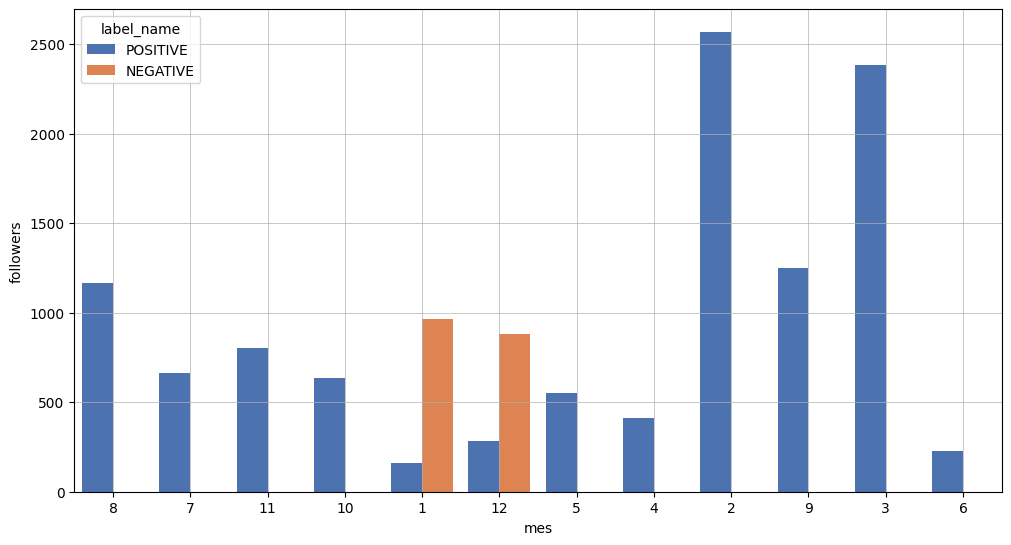

In [109]:
# Diagramas de barras combinados
tw_eda.plot_combined_bar(
                                layout = 'constrained',
                                fig_x_size = 10,
                                fig_cols = 1,
                                value_feature =  'followers',
                                target_feature = 'mes',
                                max_categories = 10,
                                divide_feature = "label_name",
                                errorbar = None,
                                estimator = np.mean, # Estimator puede ser un callable (es decir funcion) np.mean, np.sum o 'sum', ... funciones de numpy que se apliquen a un vector
                                                    # np.mean te hace la media de todo el vestor y te la plotea en el eje y
                                                    # np.sum te suma todo el vector y te lo plotea en el eje y
                                color = 0,
                                )

**Se observa que solo hay un mes con ambas etiquetas, esto será relevante mas adelante y se comentará como se puede aprovechar esta situación**

In [31]:
# Comprobamos si solo hay NEGATIVES en dec y jan o es por la escala de la grafica
tw_eda.data["mes"][tw_eda.data["label_name"] == "NEGATIVE"].unique()

array(['1', '12'], dtype=object)

In [32]:
# Contamos solo registros de jan y dec
df_solo_jan_dec = tw_eda.data[(tw_eda.data["nombre_mes"] == 'January') | (tw_eda.data["nombre_mes"] == 'December')]
df_solo_jan_dec.shape

(12323, 19)

In [33]:
# Comprobamos en que meses solo hay POSITIVES
tw_eda.data["mes"][tw_eda.data["label_name"] == "POSITIVE"].unique()

array(['8', '7', '11', '10', '1', '12', '5', '4', '2', '9', '3', '6'],
      dtype=object)

In [34]:
# Contamos los registros de los demas meses
tw_eda.data.shape[0] - df_solo_jan_dec.shape[0] 

7677

**Efectivamente, solo en diciembre y enero hay tweets etiquetados como NEGATIVE. Luego, se va a proponer un modelo solo para estos meses y otro solo para los demás meses. Esto se explicará con más detalle después, pero consistirá en que un dataset para entrenar el modelo solo contendrá tweets de estos meses, y en los demás meses se utilizará un modelo dummy que solo prediga la única etiqueta de estos meses**

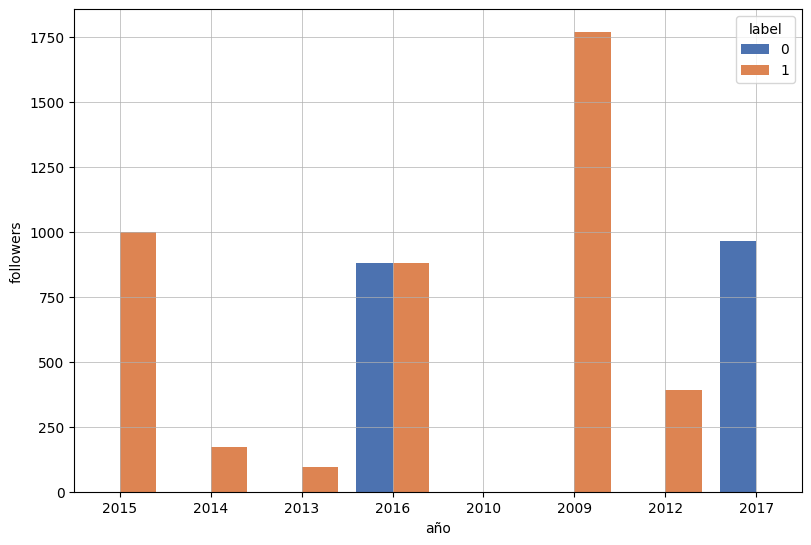

In [37]:
# Diagramas de barras combinados
# Miramos si tambien sucede para el año del post del tweet al igual que con el mes
tw_eda.plot_combined_bar(
                                layout = 'constrained',
                                fig_x_size = 8,
                                fig_cols = 1,
                                value_feature =  'followers',
                                target_feature = 'año',
                                max_categories = 10,
                                divide_feature = "label",
                                errorbar = None,
                                estimator = np.mean, # Estimator puede ser un callable (es decir funcion) np.mean, np.sum o 'sum', ... funciones de numpy que se apliquen a un vector
                                                    # np.mean te hace la media de todo el vestor y te la plotea en el eje y
                                                    # np.sum te suma todo el vector y te lo plotea en el eje y
                                color = 0,
                                )

**El resultado es similar pero no tan claro, ademas no sirve de mucho saber que en el pasado fue de esta forma pero si en que meses se twitean mas tweets de cierto sentimiento. Porque se puede extrapolar a cualquier año.**

**Diagramas de dispersión**

In [ ]:
# Scatter plot contra labels
tw_eda_std.plot_scatter(
                            fig_x_size = 14,
                            fig_cols = 2,
                            linewidth =  0.5,
                            layout = 'constrained' ,
                            x =   ['followers','friends', 'favourites', 'statuses', 'retweets'],
                            y = ["friends"],
                            size = "retweets",
                            hue = "favourites",
                            color = 0,
                            plotting_lib = 'plotly',
                            umbral = 5,
                            show_outliers = False,
                            plotly_opacity = 0.6,
                            plotly_colorscale = 20, #[19,20,21,22,23,24]
                            plotly_bgcolor = None ,# str or none
                            save_figure = None, #["jpeg","png","WebP",None]
                            name_figure = "Fig"
                            )

**Mapas de calor de la matriz de correlación [calculo del coeficiente de pearson para cada par de variables/features numéricas]**

In [ ]:
# mapa de calor de la matriz de correlacion (coeficientes de pearson entre cada par de features numericas)
tw_eda.plot_corr_heatmap(
                                fig_x_size = 10,
                                fig_y_size = 8,
                                layout = 'constrained' ,
                                linewidth = 0.5,
                                cmap = 'coolwarm', # 'Set1', 'Set2', 'Set3', 'Paired','Accent', 'Prism', 'Dark2','Paired', 'coolwarm', 'viridis', 'cubehelix'
                                annot = True, # If True, plot el valor numerico de corrrelacion (entre variables) en la celda del mapa de calor
                                fmt = '.2f' # Especificacion del formato numerico

                                )

**Se observa que el caso del dataset sin estandarizar ni dropear columnas, la variable target esta negativamente relacionada con el id del tweet, los tweets clasificados como 1 tendran menores valores del id del post**

**Pero, apenas hay correlacion lineal, excepto por el numero de followers y el numero de friends que estan positivamente realcionadas, si una aumenta la otra tambien. Podria prescindir de una de ellas para la prediccion. Tambien deberiamos investigar entre cada par de variables numericas otro tipo de relaciones no lineales usando por ejemplo metdos basados en arboles de decison como el metodo: Predictive power score**


**Predictive power score:**

In [35]:
# Predictive power score
predictors_df = pps.predictors(df, "label_name")
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,post_id,label_name,1.000000,classification,True,weighted F1,0.5008,1.000000,DecisionTreeClassifier()
1,label,label_name,1.000000,classification,True,weighted F1,0.5008,1.000000,DecisionTreeClassifier()
2,user_id,label_name,0.999599,classification,True,weighted F1,0.5008,0.999800,DecisionTreeClassifier()
3,friends,label_name,0.999199,classification,True,weighted F1,0.5008,0.999600,DecisionTreeClassifier()
4,statuses,label_name,0.998798,classification,True,weighted F1,0.5008,0.999400,DecisionTreeClassifier()
5,followers,label_name,0.985176,classification,True,weighted F1,0.5008,0.992600,DecisionTreeClassifier()
6,favourites,label_name,0.961537,classification,True,weighted F1,0.5008,0.980799,DecisionTreeClassifier()
7,año,label_name,0.946641,classification,True,weighted F1,0.5008,0.973363,DecisionTreeClassifier()
8,mes,label_name,0.773090,classification,True,weighted F1,0.5008,0.886727,DecisionTreeClassifier()
9,nombre_mes,label_name,0.773090,classification,True,weighted F1,0.5008,0.886727,DecisionTreeClassifier()


In [37]:
# Dropeamos los tweets porque es un calculo muy pesado para la matriz de pps 
df_no_text = df.drop(columns=["post_text"], inplace=False)

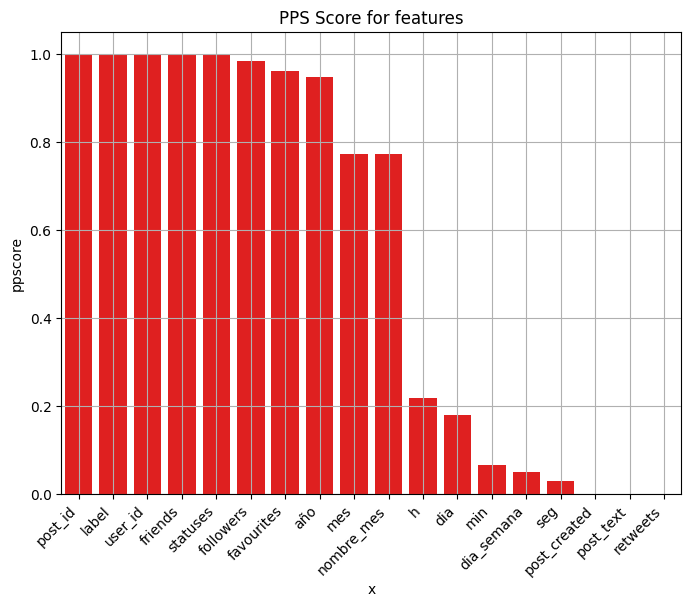

In [49]:
# Visualizacion de los pps predictors: [incluyen los tweets]
plt.figure(figsize=(12,6))
sns.barplot(data=predictors_df, x="x", y="ppscore", orient="v", color ="red")
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.title("PPS for features")
plt.show()

In [51]:
# Dropeamos los tweets porque es un calculo muy pesado para la matriz de pps 
df_no_text = df.drop(columns=["post_text"], inplace=False)
# calculate matrix 
matrix_df = pps.matrix(df_no_text)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least

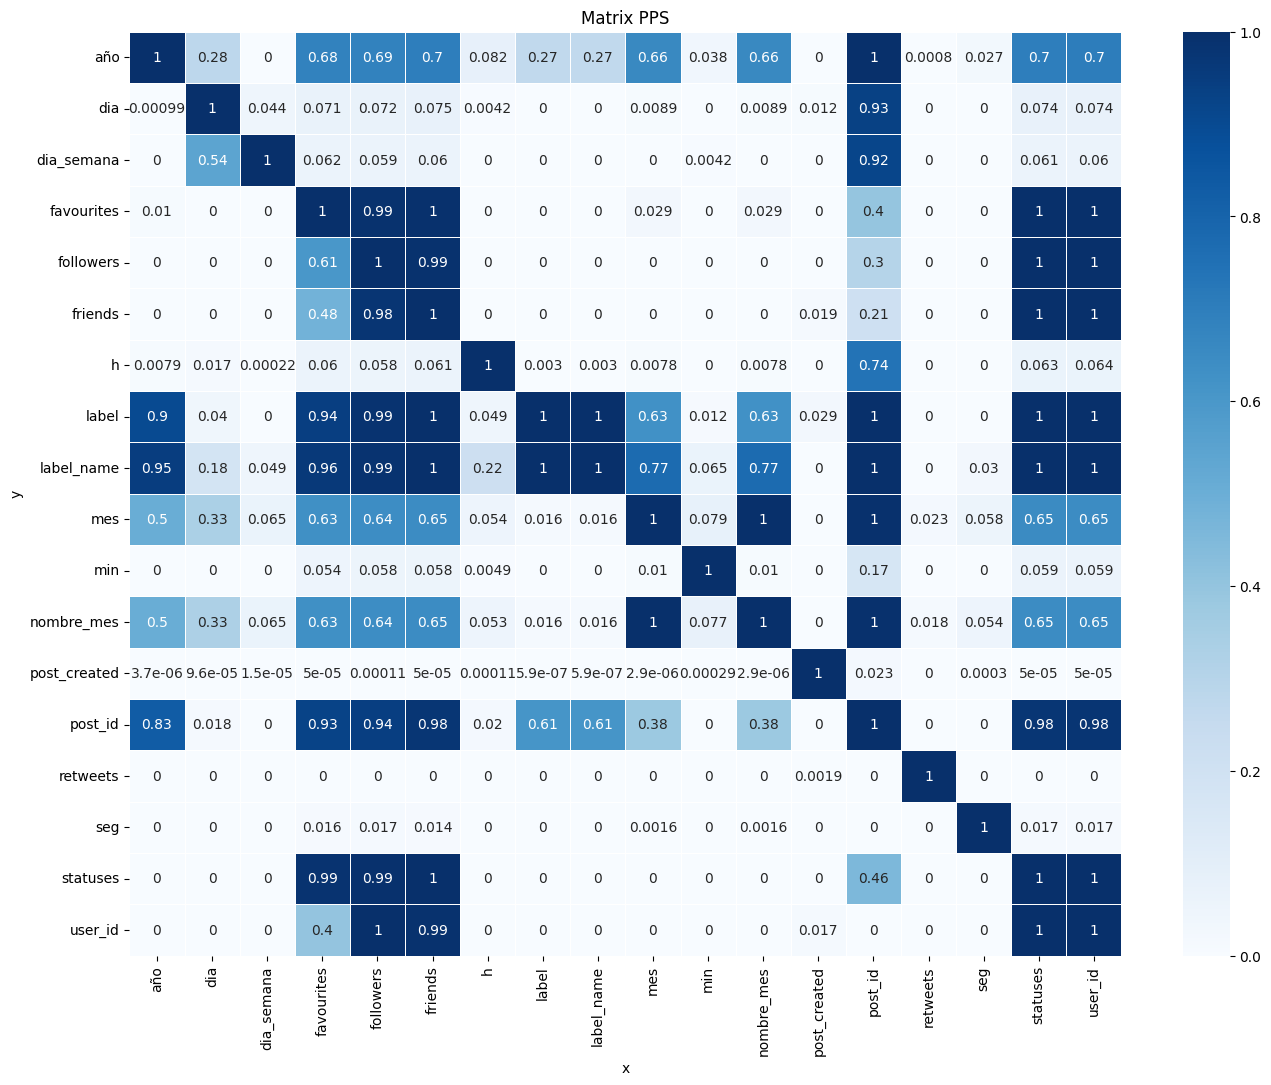

In [54]:
# Visualizacion de la pps matrix:
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.title("Matrix PPS")
plt.show()

**Se confirma que el año y el mes, por ejemplo, son features potentes para la predicción basándose en modelos de tipo árbol de decisión. Esto es porque ambas ayudan en la división de los nodos de este tipo de algoritmos, dividiendo de manera eficiente en las dos clases objetivo mejor que otras features. Luego, tiene sentido usar un modelo para ciertos meses y otro para otros** 

## **Preprocesamiento**

**Duplicados**

Numero de registros duplicados

In [55]:
# Numero de registros duplicados : mismoss valores de cada campo en toda la fila == son el mismo registro -> drop de esas filas
duplicated_registers = tw_eda.data.duplicated()

In [56]:
duplicated_registers.sum()

117

In [57]:
duplicated_registers_df = tw_eda.data[duplicated_registers]
duplicated_registers_df.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,label_name,dia,mes,año,h,min,seg,dia_semana,nombre_mes
142,631531032924303360,Wed Aug 12 18:21:46 +0000 2015,RT @richardbranson: Read this wonderful blog a...,1013187241,84,211,251,837,469,1,POSITIVE,12,8,2015,18,21,46,Wednesday,August
393,659337651514945537,Wed Oct 28 11:55:20 +0000 2015,College minor in substance abuse? #addiction h...,3346224328,189,169,698,3694,0,1,POSITIVE,28,10,2015,11,55,20,Wednesday,October
538,655952866184679424,Mon Oct 19 03:45:24 +0000 2015,What would your life be like with less #anxiety?,3346224328,189,169,698,3694,1,1,POSITIVE,19,10,2015,3,45,24,Monday,October
679,654332186842263556,Wed Oct 14 16:25:24 +0000 2015,#Therapy is an effective treatment of #depress...,3346224328,189,169,698,3694,1,1,POSITIVE,14,10,2015,16,25,24,Wednesday,October
826,652925471236202496,Sat Oct 10 19:15:37 +0000 2015,I fell in love with a #narcissist: http://t.c...,3346224328,189,169,698,3694,0,1,POSITIVE,10,10,2015,19,15,37,Saturday,October


Hay 117 filas iguales, se podrian eliminar pero no se va a realizar en este caso, dado que podrian tratarse de reiteraciones de u na persona expresando el mismo sentimiento, o de varias perosnas expresando el mismo sentimeinto y creo que es beneficioso para el entrenamiento del modelo

Número de tweets iguales

In [60]:
duplicated_texts = tw_eda.data.duplicated(subset=['post_text'])

In [61]:
duplicated_texts.sum()

512

Hay 512 tweets iguales, se proceden a evaluar sus demas campos: ids, fecha post,...

In [62]:
duplicate_text_df = tw_eda.data[duplicated_texts]
tw_duplicated_eda = Eda(data =duplicate_text_df)
tw_duplicated_eda.data.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,label_name,dia,mes,año,h,min,seg,dia_semana,nombre_mes
142,631531032924303360,Wed Aug 12 18:21:46 +0000 2015,RT @richardbranson: Read this wonderful blog a...,1013187241,84,211,251,837,469,1,POSITIVE,12,8,2015,18,21,46,Wednesday,August
393,659337651514945537,Wed Oct 28 11:55:20 +0000 2015,College minor in substance abuse? #addiction h...,3346224328,189,169,698,3694,0,1,POSITIVE,28,10,2015,11,55,20,Wednesday,October
538,655952866184679424,Mon Oct 19 03:45:24 +0000 2015,What would your life be like with less #anxiety?,3346224328,189,169,698,3694,1,1,POSITIVE,19,10,2015,3,45,24,Monday,October
679,654332186842263556,Wed Oct 14 16:25:24 +0000 2015,#Therapy is an effective treatment of #depress...,3346224328,189,169,698,3694,1,1,POSITIVE,14,10,2015,16,25,24,Wednesday,October
826,652925471236202496,Sat Oct 10 19:15:37 +0000 2015,I fell in love with a #narcissist: http://t.c...,3346224328,189,169,698,3694,0,1,POSITIVE,10,10,2015,19,15,37,Saturday,October


In [63]:
# numero de user_id diferentes en los twweets repetidos
tw_duplicated_eda.data['user_id'].unique()

array([        1013187241,         3346224328,         1383256561,
                221788137,         1629737760,         1616997456,
               3045320288,         1058067937,          377696171,
                211257562,         2285922931,         3015971504,
                 49548465,         2402651889,           47622202,
               1306425758,          632291359,           60868031,
               3138163878,          454311273,           14724376,
                343501537,          805234081,           30863895,
               1143982232,          468753088,           20118423,
               1052121847,         3249600438,           18831261,
                171999132,          145626605, 762433972273950725,
               1497350173,          490044008, 763182466098233344,
                324294391,         2780518314,         1458225506,
               1169875706], dtype=int64)

In [64]:
# textos repetidos
tw_duplicated_eda.data['post_text'].unique()

array(['RT @richardbranson: Read this wonderful blog about elephant conservation in Zimbabwe: http://t.co/MByWtcAElX #WorldElephantDay http://t.co/…',
       'College minor in substance abuse? #addiction https://t.co/5sAMvwU7Ct',
       'What would your life be like with less #anxiety?',
       '#Therapy is an effective treatment of #depression and #anxiety',
       'I fell in love  with a #narcissist: http://t.co/sRLtRufedT',
       'I love you lady!:) @Chloe_Roknich',
       "I'm doing  INSANITY MAX:30™ - Tabata Strength in Team Beachbody's SuperGym. Join Me! Go to  http://t.co/gPaLPBDw3v",
       "I'm doing  INSANITY MAX:30™ - Cardio Challenge in Team Beachbody's SuperGym. Join Me! Go to  http://t.co/gPaLPBDw3v",
       'Go to  http://t.co/gPaLPBlUEV', 'Go to  http://t.co/wA4k6PZNXo',
       "I'm doing  INSANITY MAX:30™ - Friday Fight: Round 1 in Team Beachbody's SuperGym. Join Me! Go to  http://t.co/wA4k6PZNXo",
       'Morning motivation ❤️ http://t.co/Ep5tI7DzJW',
       "I'm doi

In [65]:
# user_id [numerica] -> user_id_cat [categorica]
import string
uppercase_letters = list(string.ascii_uppercase)  # lista de letras de 'A' a 'Z' usando el módulo string
print(uppercase_letters)
map_user = {user_id:f'user_{letter}' for letter,user_id in zip(uppercase_letters,tw_duplicated_eda.data['user_id'].unique())}
tw_duplicated_eda.data['user_id_cat'] = tw_duplicated_eda.data['user_id'].map(map_user)
tw_duplicated_eda = Eda(data=tw_duplicated_eda.data)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


C:\Users\Jorge\AppData\Local\Temp\ipykernel_19560\3843545043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_duplicated_eda.data['user_id_cat'] = tw_duplicated_eda.data['user_id'].map(map_user)


In [ ]:
# Diagramas de barras
tw_duplicated_eda.plot_bar(
            layout = 'constrained',
            rotation = 0 ,
            fig_x_size = 16,
            fig_y_size = 6,
            fig_rows = 1,
            fig_cols = 2 ,
            plot_limit_categories = 20
         )

In [ ]:
user_h = tw_duplicated_eda.data[tw_duplicated_eda.data['user_id_cat'] == 'user_H']
print(user_h['post_text'].head(10))

### **Clase preprocesado de texto : lematizacion, eliminacion stopwords, urls, emojis ...**

Con esta clase se van a probar y aplicar una serie de métodos de limpieza/preprocesamiento para aplicar BOW y BOW corregido con TF-IDF para ver la frecuencia en los textos de ciertos términos, basándose en cuántas veces aparecen en cada documento o texto y ponderando por el IDF. Ambos métodos se podrían usar [aunque no se ha hecho] posteriormente para identificar estos tokens o términos más o menos frecuentes y eliminarlos según se observe si son o no relevantes para el problema de clasificación de sentimientos en cuestión que se está tratando. Después de esto, se van a obtener diferentes datasets para ver cómo se comporta el modelo en función del preprocesamiento que cada uno haya tenido.

In [70]:
# dataset solo con enero y diciembre
df_solo_jan_dec = df[(df["nombre_mes"] == 'January') | (df["nombre_mes"] == 'December')]

In [102]:
@dataclass
class TextPreprocess:
    """Class for text preprocess"""
    patron_emoji  : ClassVar = re.compile(
                                            "["
                                            "\U0001F600-\U0001F64F"  # Emoticons
                                            "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                                            "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                                            "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                                            "\U00002700-\U000027BF"  # Dingbats
                                            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                            "\U00002600-\U000026FF"  # Miscellaneous Symbols
                                            "\U00002B50-\U00002B55"  # Additional symbols
                                            "\U00002300-\U000023FF"  # Miscellaneous Technical
                                            "\U0000200D"             # Zero Width Joiner
                                            "\U00002500-\U000025FF"  # Geometric Shapes
                                            "\U00002100-\U0000219F"  # Arrows
                                            "]+",
                                            flags=re.UNICODE,
                                        )
    
    patron_chinese_japanese: ClassVar = re.compile(
        r'[\u4e00-\u9fff]|'  # Basic Chinese
        r'[\u3400-\u4dbf]|'  # Extended Chinese
        r'[\u3040-\u309f]|'  # Hiragana
        r'[\u30a0-\u30ff]|'  # Katakana
        r'[\uff66-\uff9f]'   # Half-width Katakana
    )
    task : str
    corpus : List[str]
    spc_caracters : Optional[List[str]] = field(default_factory=list)
    data : Optional[pd.DataFrame] = None
    
    def del_stopwords(self, lang: str) -> 'TextPreprocess':
        empty_words = set(stopwords.words(lang))
        for i, t in enumerate(self.corpus):
            self.corpus[i] = ' '.join([word for word in t.split() if word.lower() not in empty_words])
        return self

    def del_urls(self) -> 'TextPreprocess':
        patron_url = re.compile(r'https?://\S+|www\.\S+')
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(patron_url, '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self

    def del_html(self) -> 'TextPreprocess':
        html_tags_pattern = re.compile(r'<.*?>')
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(html_tags_pattern, '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self

    def del_emojis(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(TextPreprocess.patron_emoji, '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self
    
    def del_special(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            self.corpus[i] = ''.join([c for c in t if c != self.spc_caracters])
        return self

    def del_digits(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(r'[0-9]+', '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self
    
    def del_chinese_japanese(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(TextPreprocess.patron_chinese_japanese, '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self
    
    def del_extra_spaces(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            self.corpus[i] = re.sub(r'\s+', ' ', t.strip())
        return self

    def get_lower(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            self.corpus[i] = t.lower()
        return self

    def get_alfanumeric(self) -> 'TextPreprocess':
        for i, t in enumerate(self.corpus):
            processed_text = re.sub(r'[^\w\s]|_', '', t)
            self.corpus[i] = re.sub(r'\s+', ' ', processed_text.strip())
        return self

    def stem(self) -> 'TextPreprocess':
        Porter = PorterStemmer()
        for i, t in enumerate(self.corpus):
            word_tokens = t.split()
            stems = [Porter.stem(word) for word in word_tokens]
            self.corpus[i] = ' '.join(stems)
        return self

    def lemmatize(self) -> 'TextPreprocess':
        lemmatizer = WordNetLemmatizer()
        for i, t in enumerate(self.corpus):
            word_tokens = t.split()
            lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
            self.corpus[i] = ' '.join(lemmas)
        return self
    
    def custom_del(
                self,
                text_field_name: str,
                special_c: Optional[List[str]] = None,
                data: Optional[Union[pd.DataFrame,str]] = None,
                delete: bool = False,
                plot: bool = False
                ) -> Tuple[dict, pd.DataFrame]: 
        
        """Method for custom preprocess/delete chaaracters ferom List[texts] or text (string)"""
        if data is None:
            data = self.data
        if special_c is None:
            special_c = self.spc_caracters
        
        if data is None:
            raise ValueError("Data must be provided either as a class attribute or as a method parameter.")
        if special_c is None:
            raise ValueError("Special characters list must be provided either as a class attribute or as a method parameter.")
        
        if isinstance(data, pd.DataFrame):
            data_is_string = False
            df = data.copy().reset_index(drop=True)  # Reset index here
        elif isinstance(data, str):
            data_is_string = True
            text = data
            df = pd.DataFrame()
        else:
            raise ValueError("Unknown non-process-type of 'data' parameter")

        
        special_c_count = {}
        if not text_field_name:
            raise ValueError("text_field_name must be defined")
        
        for char in special_c:
            count = 0
            patron_busqueda = re.compile(re.escape(char))
            if data_is_string:
                match_obj = patron_busqueda.search(text)
                if char in text or match_obj is not None:
                    count += 1
                    if delete:
                        text = ''.join([c for c in text if c != char])
                        #text = re.sub(patron_busqueda, '', text) # alternative method
                special_c_count[char] = count
            else:
                for i in range(df.shape[0]):
                        text = df.loc[i, text_field_name]
                        match_obj = patron_busqueda.search(text)
                        if char in text or match_obj is not None:
                            count += 1
                            if delete:
                                df.loc[i, text_field_name] = ''.join([c for c in text if c != char])
                                #df.loc[i, text_field_name] = re.sub(patron_busqueda, '', text) # alternative method
                        special_c_count[char] = count
                
        
        if plot:
            plt.figure(figsize=(10, 6))
            plt.bar(special_c_count.keys(), special_c_count.values(), color='skyblue')
            plt.xlabel('Special Characters')
            plt.ylabel('Frequency')
            plt.title('Special Characters in Texts')
            plt.xticks(rotation=45)
            plt.grid()
            plt.show()
            
        if data_is_string:
            return special_c_count, text
        else:
            return special_c_count, df
        
    def bow(self) -> pd.DataFrame:
        vectorizador = CountVectorizer(
            input='content',
            encoding='utf-8',
            decode_error='strict',
            strip_accents=None,
            lowercase=True,
            preprocessor=None,
            tokenizer=None,
            stop_words=None,
            token_pattern=r'(?u)\b\w\w+\b',
            ngram_range=(1, 1),
            analyzer='word',
            max_df=1.0,
            min_df=1,
            max_features=None,
            vocabulary=None,
            binary=False
        )

        try:
            X = vectorizador.fit_transform(self.corpus)
        except UnicodeDecodeError as e:
            print(f"Error: characters not of the given encoding -> {e}")
            return pd.DataFrame()

        nombres_caracteristicas = vectorizador.get_feature_names_out()
        return pd.DataFrame(data=X.toarray(), columns=nombres_caracteristicas, index=self.corpus)

    def bow_tf_idf(self) -> pd.DataFrame:
        tfidf_vectorizador = TfidfVectorizer(
            input='content',
            encoding='utf-8',
            decode_error='strict',
            strip_accents=None,
            lowercase=True,
            preprocessor=None,
            tokenizer=None,
            analyzer='word',
            stop_words=None,
            token_pattern=r'(?u)\b\w\w+\b',
            ngram_range=(1, 1),
            max_df=1.0,
            min_df=1,
            max_features=None,
            vocabulary=None,
            binary=False,
            dtype=np.float64,
            norm='l2',
            use_idf=True,
            smooth_idf=True,
            sublinear_tf=False
        )

        try:
            X = tfidf_vectorizador.fit_transform(self.corpus)
        except UnicodeDecodeError as e:
            print(f"Error: characters not of the given encoding -> {e}")
            return pd.DataFrame()

        terms = tfidf_vectorizador.get_feature_names_out()
        return pd.DataFrame(data=X.toarray(), columns=terms, index=self.corpus)

    

# df original
preprocessor_bow = TextPreprocess(
    task='classification task ',
    corpus=df["post_text"].tolist(),
    spc_caracters = [
                        '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+',
                        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.',
                        '?', '/', '~', '`', '\n', '\r', '\t', '\b', '\f','__'
                    ]
)
# df original
preprocessor_bow_tf_idf = TextPreprocess(
    task='classification task ',
    corpus=df["post_text"].tolist(),
    spc_caracters = [
                        '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+',
                        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.',
                        '?', '/', '~', '`', '\n', '\r', '\t', '\b', '\f','__'
                    ]
)

# Solo meses enero y diciemnbre
preprocessor_bow_tf_idf_jan_dec = TextPreprocess(
    task='classification task ',
    corpus=df_solo_jan_dec["post_text"].tolist(),
    spc_caracters = [
                        '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+',
                        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.',
                        '?', '/', '~', '`', '\n', '\r', '\t', '\b', '\f','__'
                    ]
)

bow_df = preprocessor_bow \
    .del_urls() \
    .get_lower() \
    .del_chinese_japanese() \
    .get_alfanumeric() \
    .del_digits() \
    .del_emojis() \
    .del_special() \
    .bow()


bow_df_tf_idf = preprocessor_bow_tf_idf \
    .del_urls() \
    .del_emojis() \
    .get_lower() \
    .del_chinese_japanese() \
    .get_alfanumeric() \
    .del_digits() \
    .del_special() \
    .bow_tf_idf()
    
bow_df_tf_idf_jan_dec = preprocessor_bow_tf_idf_jan_dec \
    .del_urls() \
    .del_emojis() \
    .get_lower() \
    .del_chinese_japanese() \
    .get_alfanumeric() \
    .del_digits() \
    .del_special() \
    .bow_tf_idf()

**Plotean y muestran los resultados del BOW y BOW con TF-IDF. Después se asignan a tres datasets diferentes para entrenar el modelo.**

In [103]:
# Check what are the tokens/terms most frequent in the corpus according the two methods [sum of the df columns -> (row,column) : (doc,term)]
most_frequent_bow = bow_df.sum(axis=0, skipna=True).sort_values(ascending=False)
most_frequent_bow_tf_idf = bow_df_tf_idf.sum(axis=0, skipna=True).sort_values(ascending=False)
most_frequent_bow_tf_idf_jan_dec = bow_df_tf_idf_jan_dec.sum(axis=0, skipna=True).sort_values(ascending=False)

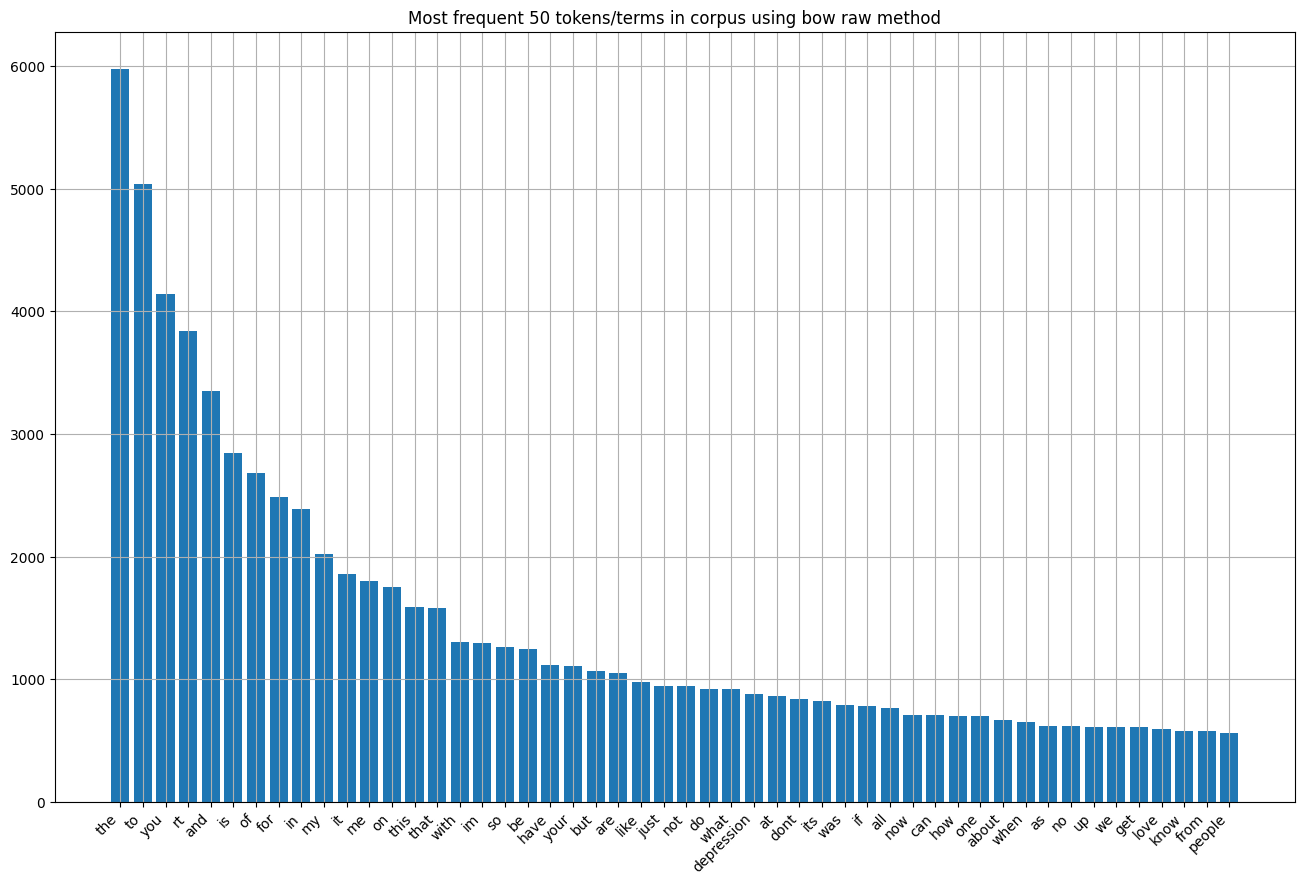

In [104]:
num_tokens=50
plt.figure(figsize=(16,10))
plt.bar(x=most_frequent_bow.head(num_tokens).index, height=most_frequent_bow.head(num_tokens).values)
plt.xticks(rotation=45, ha='right')
plt.title(f"Most frequent {num_tokens} tokens/terms in corpus using bow raw method")
plt.grid()
plt.show()

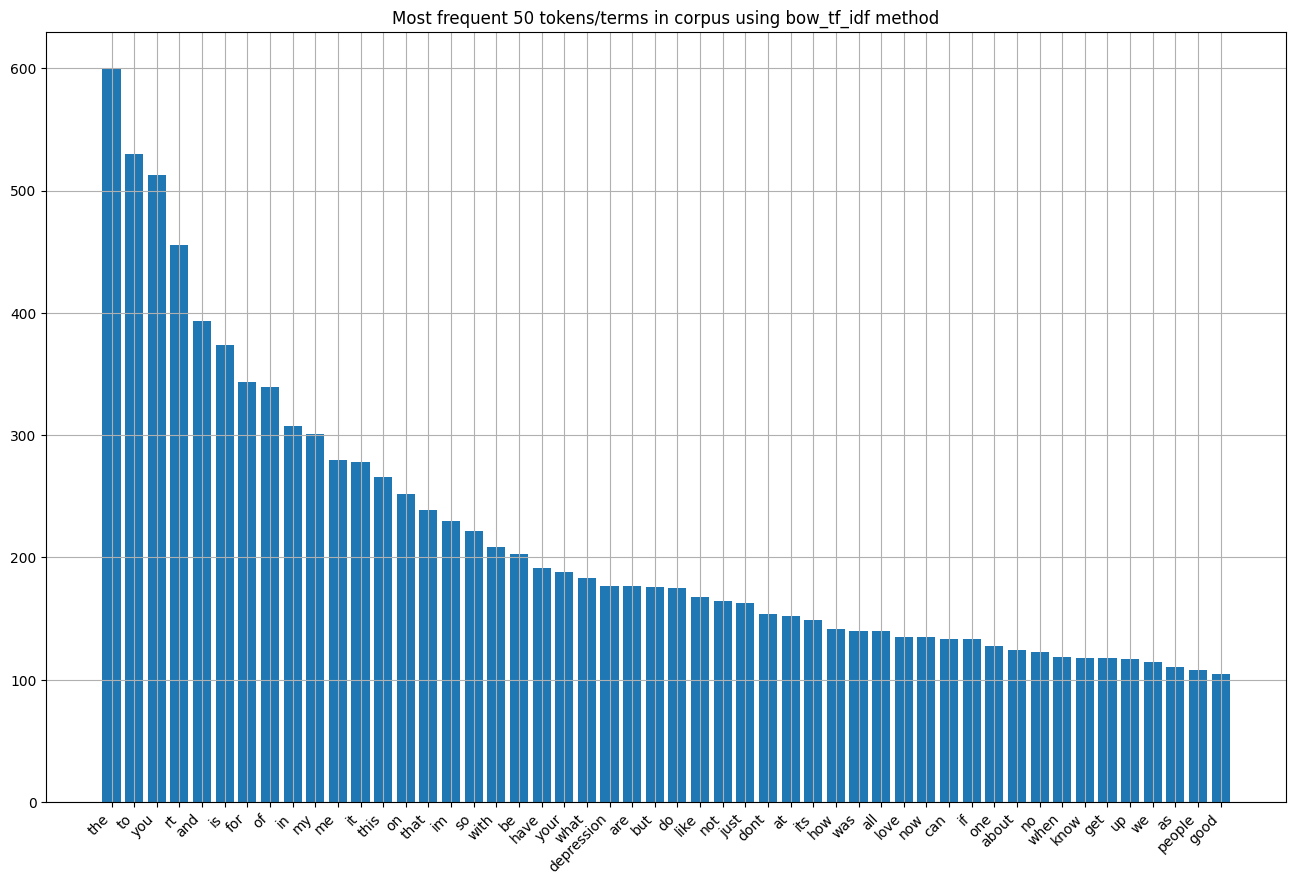

In [105]:
num_tokens=50
plt.figure(figsize=(16,10))
plt.bar(x=most_frequent_bow_tf_idf.head(num_tokens).index, height=most_frequent_bow_tf_idf.head(num_tokens).values)
plt.xticks(rotation=45, ha='right')
plt.title(f"Most frequent {num_tokens} tokens/terms in corpus using bow_tf_idf method")
plt.grid()
plt.show()

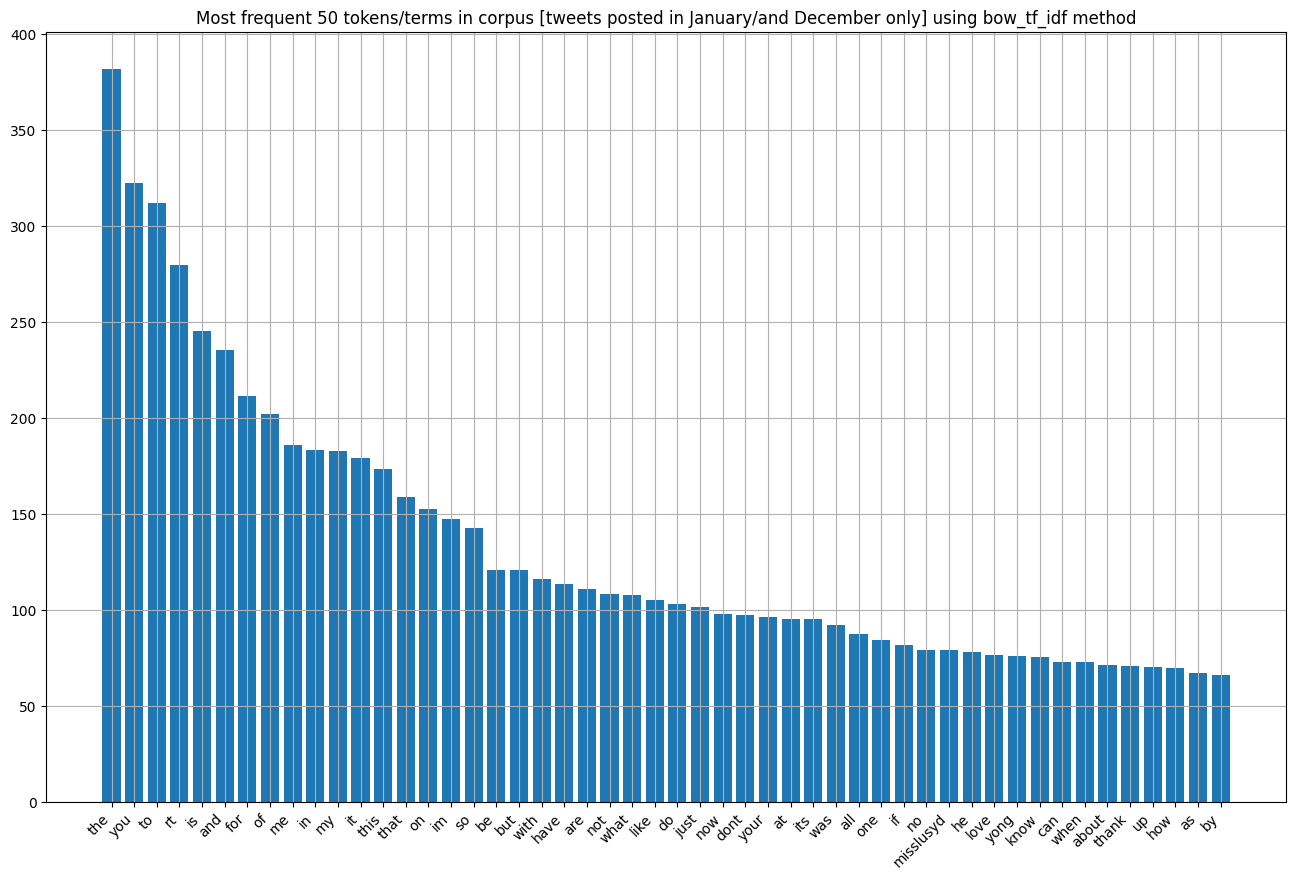

In [106]:
num_tokens=50
plt.figure(figsize=(16,10))
plt.bar(x=most_frequent_bow_tf_idf_jan_dec.head(num_tokens).index, height=most_frequent_bow_tf_idf_jan_dec.head(num_tokens).values)
plt.xticks(rotation=45, ha='right')
plt.title(f"Most frequent {num_tokens} tokens/terms in corpus [tweets posted in January/and December only] using bow_tf_idf method")
plt.grid()
plt.show()

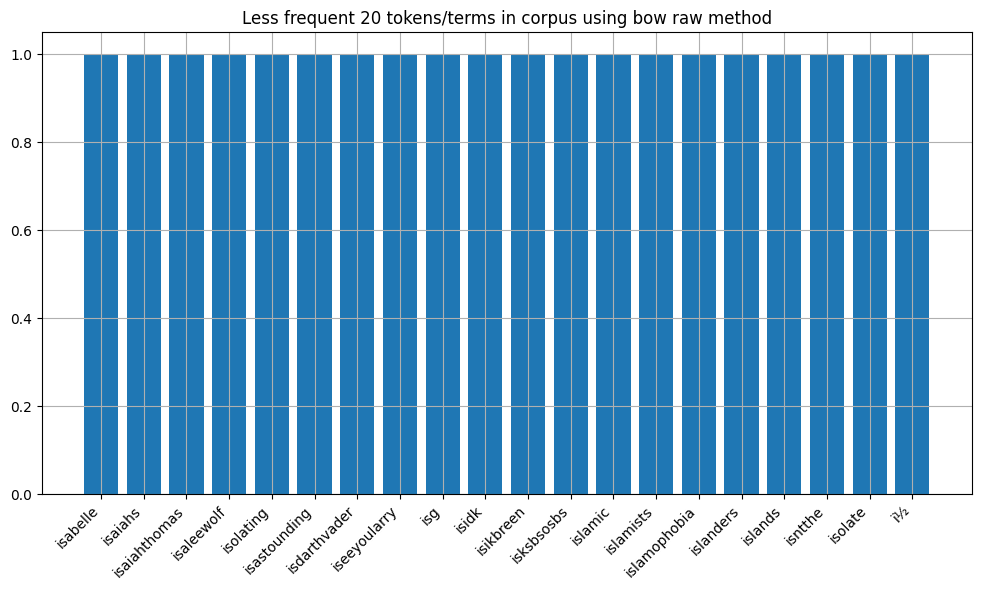

In [107]:
num_tokens=20
plt.figure(figsize=(12,6))
plt.bar(x=most_frequent_bow.tail(num_tokens).index, height=most_frequent_bow.tail(num_tokens).values)
plt.xticks(rotation=45, ha='right')
plt.title(f"Less frequent {num_tokens} tokens/terms in corpus using bow raw method")
plt.grid()
plt.show()

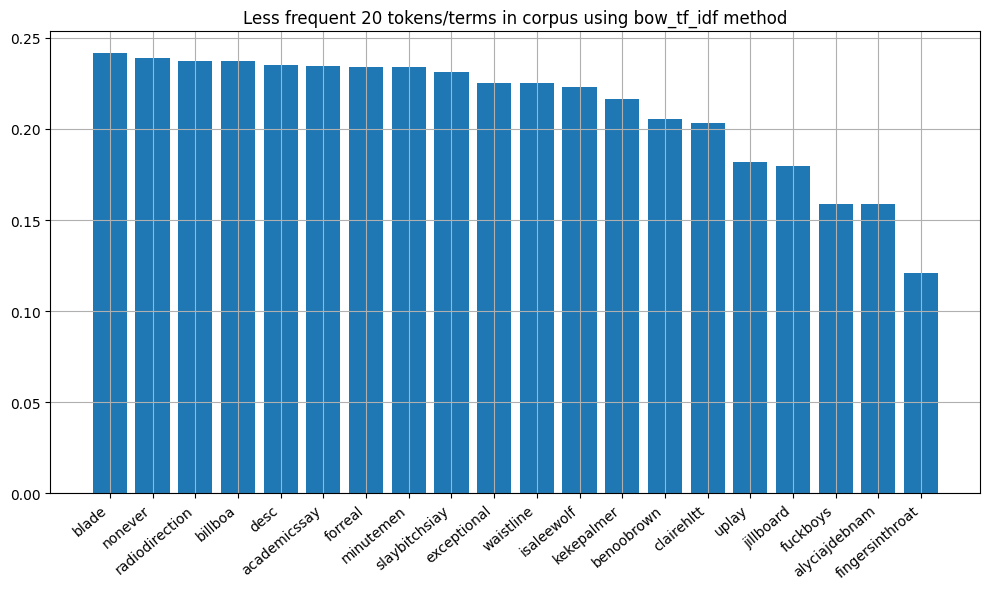

In [108]:
num_tokens=20
plt.figure(figsize=(12,6))
plt.bar(x=most_frequent_bow_tf_idf.tail(num_tokens).index, height=most_frequent_bow_tf_idf.tail(num_tokens).values)
plt.xticks(rotation=40, ha='right')
plt.title(f"Less frequent {num_tokens} tokens/terms in corpus using bow_tf_idf method")
plt.grid()
plt.show()

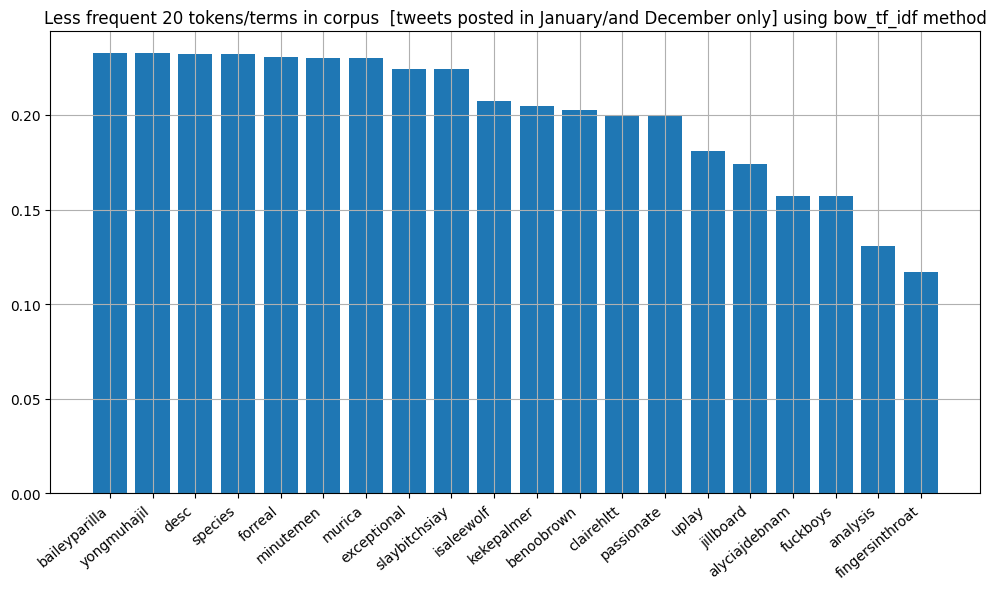

In [109]:
num_tokens=20
plt.figure(figsize=(12,6))
plt.bar(x=most_frequent_bow_tf_idf_jan_dec.tail(num_tokens).index, height=most_frequent_bow_tf_idf_jan_dec.tail(num_tokens).values)
plt.xticks(rotation=40, ha='right')
plt.title(f"Less frequent {num_tokens} tokens/terms in corpus  [tweets posted in January/and December only] using bow_tf_idf method")
plt.grid()
plt.show()

**A continuación se exploran y plotean los caracteres especiales existentes en el texto original y su frecuencia [esto se han eliminado de los tres datasets, una vía de investigación y sobretodo con modelo de tipo DEBERTA sería no eliminarlos para ver si ayudan a mejorar la predicción]**

) missing from font(s) DejaVu Sans.P\trabajo\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8 ) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


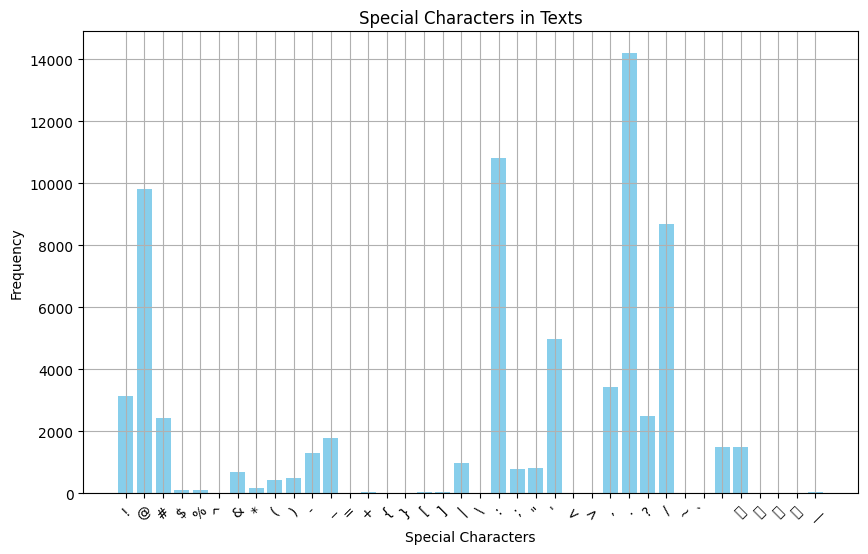

In [111]:
# Exploring and visualization of special caracters
preprocessor_special_only= TextPreprocess(
    task='classification task ',
    corpus=df["post_text"].tolist(),
    data = df,
    spc_caracters = [
                        '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+',
                        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.',
                        '?', '/', '~', '`', '\n', '\r', '\t', '\b', '\f','__'
                    ]
)

df_box_tf_idf = preprocessor_special_only.custom_del(
                                                        text_field_name ='post_text',
                                                        delete=False,
                                                        plot= True
                                                    )

## **INTENTO DE CLASIFICACION CON MODELO CON DEBERTA, USO DE LIBRERIA TRANSFORMERS Y DE LIBERRIA DATASETS DE HG**

### Creacion dataset de entrenamiento [HG Dataset]

In [112]:
# util functions
def get_current_utc_date_iso():
    # Get the current date and time in UTC and format it directly
    return datetime.now(timezone.utc).strftime("%Y%m%d%H%M%S")

In [113]:
class TwDataset:
  def __init__(self, tokenizer,padding, truncate, max_position_embeddings, df, text_field_name, label_field_name, id_field_name):
    self.tokenizer = tokenizer
    self.padding = padding
    self.truncate = truncate
    self.max_length = max_position_embeddings
    self.data = df
    try:
      self.labels = df[label_field_name].unique()
    except Exception as e:
      print(e)
    self.label2id = {l:i for i,l in enumerate(self.labels)}
    self.id2label = {i:l for i,l in enumerate(self.labels)}
    self.text_f_name = text_field_name
    self.label_f_name = label_field_name
    if id_field_name:
      self.id_field_name = id_field_name
      self.ids = {k:[] for k in id_field_name}
      print('ID FIELDS :',self.ids)
    self.tokens = []
    self.len_texts = []


  def _tokenize_texts(self, texts : List[str], tensor :bool = False):
    if isinstance(texts , list):
      if self.tokenizer is not None:
        if tensor:
          x = self.tokenizer(texts,  padding=self.padding, truncation=self.truncate,  max_length =self.max_length, return_tensors="pt")
        else:
          x = self.tokenizer(texts, padding=self.padding, truncation=self.truncate, max_length =self.max_length)
        return x
      else:
        raise ValueError('No tokenizer passed as argument')


  def _process_dataset(self, dataset) -> dict:
      text_name_field = self.text_f_name if isinstance(self.text_f_name, str) else None
      if text_name_field is None:
          raise AttributeError("Text field name must be str")

      text = str(dataset[text_name_field]) # aseguramos tipo de dato es str

      # tokenizacion
      #tokenized = self.tokenizer(text, padding=True, truncation=True, ,max_lenght =512 )
      tokenized = self.tokenizer(text,padding=self.padding, truncation=self.truncate, max_length =self.max_length)

      # calculo de tokens , caracteres y ids por texto
      self.tokens.append(len(tokenized["input_ids"]))
      self.len_texts.append(len(text))
      for id_i in self.ids.keys():
        self.ids[id_i].append(dataset[id_i])

      # labels
      tokenized["labels"] = dataset[self.label_f_name]

      return tokenized


  def get_hg_dataset(self, split : bool = False, tokenize :bool = True, from_csv: bool =False, csv_path :str = None ):

      # load original dataset from path
      if from_csv:
        try:
          dataset = load_dataset("csv", data_files=csv_path, split = 'train')
          try:
            dataset = dataset.remove_columns(["Unnamed: 0"])
          except:
            pass
          print(dataset)
        except Exception as e:
            print(e)
        if split:
          dataset_train_test = dataset.train_test_split(test_size = 0.2, shuffle = True, seed =42)
          dataset_train_val = dataset_train_test["train"].train_test_split(test_size = 0.1, shuffle = True, seed =42)
          dataset = DatasetDict({
                                                  "train": dataset_train_val["train"],
                                                  "validation": dataset_train_val["test"],
                                                  "test":dataset_train_test["test"]
                                                  })
      else:
        try:
            if split:
                # test 20 % train
                df_train_val, df_test = train_test_split(self.data, test_size=0.2, random_state=42)
                print('\n---------------------------------------------------')
                print("Test df shape : ", df_test.shape)
                # Validation 10% de train
                df_train, df_val = train_test_split(df_train_val, test_size=0.1, random_state=42)
                print("Train df shape : ", df_train.shape)
                print("validation df shape : ", df_val.shape)
                print('---------------------------------------------------\n')


                dataset = DatasetDict({
                                                    "train": ds.Dataset.from_pandas(df_train, preserve_index=False),
                                                    "validation": ds.Dataset.from_pandas(df_val, preserve_index=False),
                                                    "test":ds.Dataset.from_pandas(df_test, preserve_index=False)
                                                    })
            else:
                dataset = DatasetDict({
                                    "train": ds.Dataset.from_pandas(self.data, preserve_index=False)
                                    })


            print("\nHG DATASET :\n ", dataset)
            #dataset = load_dataset(self.path).remove_columns(["Unnamed: 0"])
        except Exception as e:
            print(e)


      if tokenize:
          dataset_tokenize = dataset.map(self._process_dataset, batched=False, remove_columns=self.data.columns.tolist())
      else:
          dataset_tokenize = None
      print("\nHG DATASET TOKENIZE:\n ", dataset_tokenize)
      return dataset,dataset_tokenize

  def get_plots(self, dir_path: str, figure_name: str, show : bool = False):

      def addlabels(x, y, text, size, rotation):
          colors = ['g', 'r', 'c', 'm', 'y', 'k']  # Removed 'b' (blue) from the list
          c = 0
          for i in range(len(x)):
              if c >= len(colors):
                  c = 0
              plt.annotate(text[i], (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center', size=size, color=colors[c], rotation=rotation)
              c += 1

      # Calculate the number of tokens for each document
      if self.tokens and self.len_texts:

          # Plotting the histogram of token counts
          plt.figure(figsize=(10, 6))
          plt.hist(self.tokens, bins=30, color="blue", edgecolor="black", alpha=0.7)
          plt.title("Histogram of Token Counts")
          plt.xlabel("Token Count")
          plt.ylabel("Frequency")
          plt.grid(axis="y", alpha=0.75)
          if show:
            plt.show()
          else:
            plot_file = os.path.join(dir_path, get_current_utc_date_iso() + "_" + figure_name + "_" + "token_hist.png")
            plt.savefig(plot_file)
            plt.close()

          # Plotting the histogram of characters counts
          plt.figure(figsize=(10, 6))
          plt.hist(self.len_texts, bins=30, color="red", edgecolor="black", alpha=0.7)
          plt.title("Histogram of Character Counts")
          plt.xlabel("Character Count")
          plt.ylabel("Frequency")
          plt.grid(axis="y", alpha=0.75)
          if show:
            plt.show()
          else:
            plot_file = os.path.join(dir_path, get_current_utc_date_iso() + "_" + figure_name + "_" + "character_hist.png")
            plt.savefig(plot_file)
            plt.close()

          # Plotting ordered chunk vs num tokens
          SAMPLE_PLOT_SIZE = min(100, len(self.len_texts))
          NUM_CHUNKS = np.arange(SAMPLE_PLOT_SIZE)

          plt.figure(figsize=(10, 6))
          plt.bar(NUM_CHUNKS, self.tokens[:SAMPLE_PLOT_SIZE], color="blue", alpha=1)
          addlabels(NUM_CHUNKS, self.tokens[:SAMPLE_PLOT_SIZE], [str(t) for t in self.tokens[:SAMPLE_PLOT_SIZE]], 10, 0)
          for i,id_i in enumerate(self.id_field_name):
              plot_id = []
              for v in self.ids[id_i][:SAMPLE_PLOT_SIZE]:
                  plot_id.append('#'+ str(id_i)+':'+str(v))
              addlabels(
                          x = NUM_CHUNKS,
                          y = np.full(len(self.tokens[:SAMPLE_PLOT_SIZE]), np.max(self.tokens[:SAMPLE_PLOT_SIZE]))*(0.1*(i+1)),
                          text = plot_id,
                          size = 6,
                          rotation = 40)
          plt.title("Token counts per chunk index")
          plt.xlabel("CHUNK index")
          plt.ylabel("Token counts")
          plt.grid(axis="y", alpha=0.75)
          if show:
            plt.show()
          else:
            plot_file = os.path.join(dir_path, get_current_utc_date_iso() + "_" + figure_name + "_" + "num_token_per_chunk.png")
            plt.savefig(plot_file)
            plt.close()

          plt.figure(figsize=(10, 6))
          plt.bar(NUM_CHUNKS, self.len_texts[:SAMPLE_PLOT_SIZE], color="red", alpha=1)
          addlabels(NUM_CHUNKS, self.len_texts[:SAMPLE_PLOT_SIZE], [str(t) for t in self.len_texts[:SAMPLE_PLOT_SIZE]], 10, 0)
          for i,id_i in enumerate(self.id_field_name):
              plot_id = []
              for v in self.ids[id_i][:SAMPLE_PLOT_SIZE]:
                  plot_id.append('#'+ str(id_i)+':'+str(v))
              addlabels(
                          x = NUM_CHUNKS,
                          y = np.full(len(self.len_texts[:SAMPLE_PLOT_SIZE]), np.max(self.tokens[:SAMPLE_PLOT_SIZE]))*(0.2*(i+1)),
                          text = plot_id,
                          size = 6,
                          rotation = 40)
          plt.title("Character counts per chunk index")
          plt.xlabel("CHUNK index")
          plt.ylabel("Character counts")
          plt.grid(axis="y", alpha=0.75)
          if show:
            plt.show()
          else:
            plot_file = os.path.join(dir_path, get_current_utc_date_iso() + "_" + figure_name + "_" + "num_character_per_chunk.png")
            plt.savefig(plot_file)
            plt.close()

In [114]:
# MODEL
from transformers import AutoModel, AutoModel, AutoConfig
from transformers import DebertaV2Config
CONFIG_DEBERTA_V2 = DebertaV2Config()

#MODEL_NAME = 'microsoft/deberta-v2-xlarge'
MODEL_NAME = 'microsoft/deberta-v3-base'


CONFIG_DEBERTA_V3 = AutoConfig.from_pretrained(
                                        pretrained_model_name_or_path =MODEL_NAME
                                        )
# Como deberta-v3 no tiene definido la maxima dimension de los embedding input 
# # y su configuracxion es similar a la de deberta-v2 que si lo tiene definido se lo copiamos ded su config 
CONFIG_DEBERTA_V3.max_position_embeddings= CONFIG_DEBERTA_V2.max_position_embeddings

"""no efecto en el tokenizer:
# Para que se haga efectivo en la confg del tokenizer tambnien hay que añadir una nueva key al modelo con el mismo valor:
CONFIG_DEBERTA_V3.max_model_input_sizes =CONFIG_DEBERTA_V2.max_position_embeddings
"""

model = AutoModel.from_pretrained(
                                        pretrained_model_name_or_path = MODEL_NAME,
                                        config = CONFIG_DEBERTA_V3)

tokenizer = AutoTokenizer.from_pretrained(  
                                          pretrained_model_name_or_path =MODEL_NAME,
                                          use_fast=True,
                                          model_max_length =CONFIG_DEBERTA_V3.max_position_embeddings
                                          )

c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\transformers\convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [115]:
# prueba tokenizer
tokenizer.encode(text = "holamdkmdkdmewkmdmdkdmdmkdmdkm2d",return_tensors='pt')

tensor([[    1, 36752,  1764,   407,  6275, 32921,   407,   358, 17326,  6275,
           407,   358, 32921,   407,   358,   407, 57493,   407,   358,   407,
          6275,   445,   407,     2]])

In [116]:
# Metodos de la clase : AutoConfig de libreria transformers
dir(CONFIG_DEBERTA_V3)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attn_implementation',
 '_attn_implementation_internal',
 '_auto_class',
 '_commit_hash',
 '_create_repo',
 '_dict_from_json_file',
 '_get_config_dict',
 '_get_files_timestamps',
 '_get_generation_defaults',
 '_has_non_default_generation_parameters',
 '_name_or_path',
 '_set_token_in_kwargs',
 '_upload_modified_files',
 'add_cross_attention',
 'architectures',
 'attention_probs_dropout_prob',
 'attribute_map',
 'bad_words_ids',
 'begin_suppress_tokens',
 'bos_token_id',
 'chunk_size_feed_forward',
 'cross_attention_hidden_size',
 'decoder_start_token_id',
 'dict_torc

In [117]:
# DEBERTA V3 CONFIG
CONFIG_DEBERTA_V3

DebertaV2Config {
  "_name_or_path": "microsoft/deberta-v3-base",
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-07,
  "max_position_embeddings": 512,
  "max_relative_positions": -1,
  "model_type": "deberta-v2",
  "norm_rel_ebd": "layer_norm",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_dropout": 0,
  "pooler_hidden_act": "gelu",
  "pooler_hidden_size": 768,
  "pos_att_type": [
    "p2c",
    "c2p"
  ],
  "position_biased_input": false,
  "position_buckets": 256,
  "relative_attention": true,
  "share_att_key": true,
  "transformers_version": "4.41.1",
  "type_vocab_size": 0,
  "vocab_size": 128100
}

In [118]:
# DEBERTA V2 CONFIG
CONFIG_DEBERTA_V2

DebertaV2Config {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1536,
  "initializer_range": 0.02,
  "intermediate_size": 6144,
  "layer_norm_eps": 1e-07,
  "max_position_embeddings": 512,
  "max_relative_positions": -1,
  "model_type": "deberta-v2",
  "num_attention_heads": 24,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "pooler_dropout": 0,
  "pooler_hidden_act": "gelu",
  "pooler_hidden_size": 1536,
  "pos_att_type": null,
  "position_biased_input": true,
  "relative_attention": false,
  "transformers_version": "4.41.1",
  "type_vocab_size": 0,
  "vocab_size": 128100
}

In [119]:
# TOKENIZER CONFIG
tokenizer

DebertaV2TokenizerFast(name_or_path='microsoft/deberta-v3-base', vocab_size=128000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	128000: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [120]:
## Probamos a contar con cuantos registros nos quedariamos si quitasemos de los meses que no sean january y dec porque esos meses no tienen la label 1
df_jan_dec = df[(df["nombre_mes"] == 'January') | (df["nombre_mes"] == 'December')]
df_jan_dec.shape[0]

12323

In [121]:
dataset = TwDataset(
                    tokenizer =tokenizer ,
                    padding = True,
                    truncate = True,
                    max_position_embeddings = CONFIG_DEBERTA_V3.max_position_embeddings,
                    df =df,
                    text_field_name = 'post_text',
                    label_field_name = 'label',
                    id_field_name = ['post_id']
                    )
ruta_data_colab = "/content/drive/MyDrive/NLP/data/data_tw.csv"
ruta_data_kaggle = "/kaggle/input/data-tw"
_, dataset_split = dataset.get_hg_dataset(split = True, tokenize = True, from_csv = False, csv_path = ruta_data_kaggle )

ID FIELDS : {'post_id': []}

---------------------------------------------------
Test df shape :  (4000, 19)
Train df shape :  (14400, 19)
validation df shape :  (1600, 19)
---------------------------------------------------


HG DATASET :
  DatasetDict({
    train: Dataset({
        features: ['post_id', 'post_created', 'post_text', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label', 'label_name', 'dia', 'mes', 'año', 'h', 'min', 'seg', 'dia_semana', 'nombre_mes'],
        num_rows: 14400
    })
    validation: Dataset({
        features: ['post_id', 'post_created', 'post_text', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label', 'label_name', 'dia', 'mes', 'año', 'h', 'min', 'seg', 'dia_semana', 'nombre_mes'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['post_id', 'post_created', 'post_text', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label', 'label_name', 'dia', 'mes',

Map:   0%|          | 0/14400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]


HG DATASET TOKENIZE:
  DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 14400
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 4000
    })
})


In [122]:
dataset_split["train"]["labels"][0:10]

[1, 1, 0, 1, 0, 0, 1, 0, 0, 1]

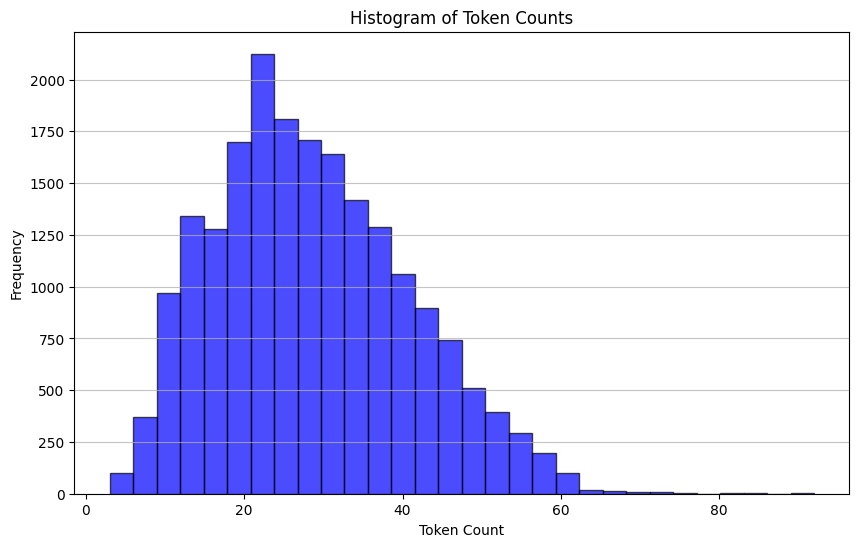

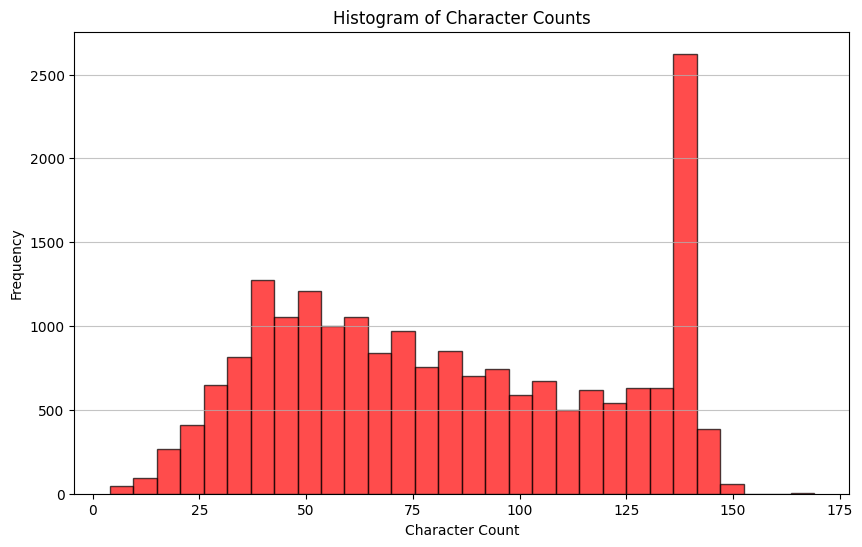

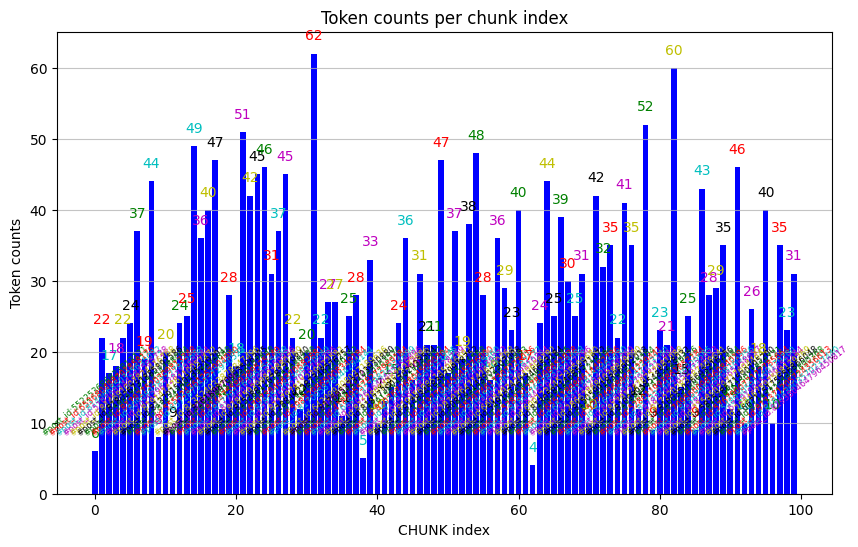

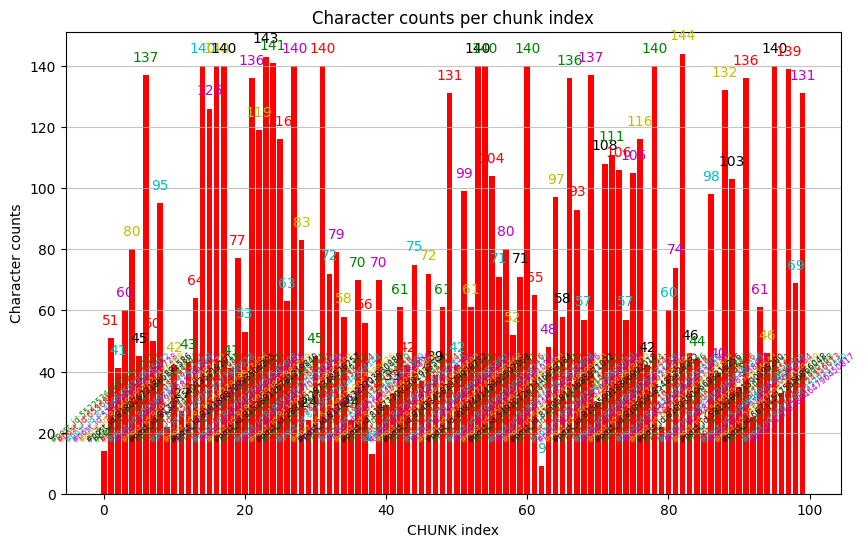

In [123]:
ruta_fig_colab = '/content/drive/MyDrive/NLP/data'
ruta_fig_local = "/content/drive/MyDrive/NLP/data/figures"
dataset.get_plots(dir_path = ruta_fig_colab, figure_name = 'tw_fig', show = True)

Los diagramas anteriores muestran el número de tokens y el número de caracteres por cada texto dentro del corpus e incorporan en tamaño bastante pequeño el ID de dicho tweet. La razón de esto es ver si se está truncando el texto de entrada del modelo DEBERTA porque la secuencia de tokens a lo mejor es muy elevada. Algo que no sucede realmente para ningún texto.

### **CONFIGURACION MODELO DEBERTA**

- paper DEBERTA:

He, P., Liu, X., Gao, J., & Chen, W. (2020). DeBERTa: Decoding-enhanced BERT with disentangled attention. *arXiv*. https://doi.org/10.48550/arXiv.2006.03654


#### CONFIGURACION PARA EL MODELO DE CLASIFICACION DE TEXTO [PARA PASARLO A ARCHIVO JSON Y GUARDARLO UNA VEZ SE HA FINE TUNEADO]

In [124]:
FILE_PATH_CONF = './conf/model.json'
CHECK_POINT_PATH = "./model/checkpoint"
MODEL_SAVE_PATH = "./model"

# max_position_embeddings : The maximum sequence length that this model might ever be used with. Typically set this to something large just in case (e.g., 512 or 1024 or 2048).
MODEL_CONFG ={
  "model": {
              "name": MODEL_NAME,              
              "emergency_save_path": MODEL_SAVE_PATH+"/last_params",
              "config" : {
                            "_name_or_path": "microsoft/deberta-v3-base",
                              "attention_probs_dropout_prob": 0.1,
                              "hidden_act": "gelu",
                              "hidden_dropout_prob": 0.1,
                              "hidden_size": 768,
                              "initializer_range": 0.02,
                              "intermediate_size": 3072,
                              "layer_norm_eps": 1e-07,
                              "max_position_embeddings": 512,
                              "max_relative_positions": -1,
                              "model_type": "deberta-v2",
                              "norm_rel_ebd": "layer_norm",
                              "num_attention_heads": 12,
                              "num_hidden_layers": 12,
                              "pad_token_id": 0,
                              "pooler_dropout": 0,
                              "pooler_hidden_act": "gelu",
                              "pooler_hidden_size": 768,
                              "pos_att_type": [
                                "p2c",
                                "c2p"
                              ],
                              "position_biased_input": False,
                              "position_buckets": 256,
                              "relative_attention": True,
                              "share_att_key": True,
                              "transformers_version": "4.39.3",
                              "type_vocab_size": 0,
                              "vocab_size": 128100
                            }
              
          },
  "problem" : {
                "labels_to_pred" : [0,1]
  },
  "trainer":{
              "callbacks":{
                            "EarlyStoppingCallback": {
                                                        "early_stopping_patience":50,
                                                        "early_stopping_threshold":0.0
                                                      }
                          }
              },

  "metrics": {
              "type":
                    {
                    "f1": {"compute": True, "method": ["micro", "macro", "weighted","binary"]},
                    "recall": {"compute": True, "method": ["micro", "macro", "weighted","binary"]},
                    "MulticlassAccuracy": {"compute": True, "method": ["micro", "macro", "None"]},
                    "precision":{"compute": True, "method": ["micro", "macro", "weighted","binary"]}
                    },
                "optimize": {"name":"precision_binary"}
              },
  "training_args": {
                    "output_dir" : CHECK_POINT_PATH,
                    "logging_dir" : MODEL_SAVE_PATH+"/logs",
                    "eval_strategy" : "epoch",
                    "report_to":"tensorboard",
                    "save_strategy" : "epoch",
                    "learning_rate":3e-04,
                    "per_device_train_batch_size":36,
                    "per_device_eval_batch_size":16,
                    "num_train_epochs":50,
                    "weight_decay":0.01,
                    "warmup_steps":500,
                    "adam_epsilon":1e-08,
                    "load_best_model_at_end":True,
                    "metric_for_best_model":"precision_binary",
                    "gradient_accumulation_steps": 10,
                    "warmup_ratio":0.03,
                    "fp16_full_eval":False,
                    "fp16":True,
                    "bf16":False
                  }
}

In [125]:

def create_directory(directory_path):
    """
    Check if a directory exists and create it if it doesn't.

    Parameters:
    directory_path (str): The path of the directory to check and create.
    """
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
        return directory_path
    else:
        print(f"Directory '{directory_path}' already exists.")
        return directory_path
        

# Volcamos nueva configuracion del modelo obtenida del Autoconfig en el json[por si cambiasemos de modelo]
try:
    with open(FILE_PATH_CONF, "w") as outfile:
        json.dump(MODEL_CONFG, outfile)
except Exception as e:
    print(e)

In [126]:
# Modelo clasificacion binaria
class BertNet:

    def __init__(self, model_conf_path: str, config_mode = 'json', config : dict = None):
        self.config_path = model_conf_path
        if  config_mode == 'json':
            self.config = self._parse_config()
        if  config_mode == 'dict':
            self.config = config
        self.model_name = self._get_model_name()
        self.model_tokenizer = self._get_tokenizer()
        self.model_config = self._get_model_config()
        self.model = self._get_model()
        self.compute_metric_f = self._get_metrics()
        self.train_args = self._get_training_args()

    def _parse_config(self) -> Dict:
        if not os.path.exists(self.config_path):
            raise FileNotFoundError(f"Config file not found at {self.config_path}")
        with open(self.config_path, 'r') as file:
            config = json.load(file)
        return config

    def _get_model_name(self):
        model = self.config.get("model", {})
        model_name = model.get("name", None)
        if model_name is None:
            raise ValueError("Model name not defined in the model config file")
        return model_name

    def _get_model_config(self):
        problem = self.config.get("problem", {})
        self.labels = problem.get("labels_to_pred", None)
        if self.labels is None:
            raise ValueError("Labels to predict not defined in the model config file")
        self.id2label = {i: lab for i, lab in enumerate(self.labels)}
        self.label2id = {lab: i for i, lab in enumerate(self.labels)}
        self.config["model"]["config"]["id2label"] = self.id2label
        self.config["model"]["config"]["label2id"] = self.label2id
        self.config["model"]["config"]["num_labels"] = len(self.labels)
        try:
            return AutoConfig.from_pretrained(
                pretrained_model_name_or_path =MODEL_NAME,
                config = self.config["model"]["config"]
            )
        except Exception as e:
            raise ValueError(f"Error in get Config Model method: {e}")

    def _get_model(self):
        try:
            return AutoModelForSequenceClassification.from_pretrained(
                                        pretrained_model_name_or_path=self.model_name, 
                                        config=self.model_config
                                        )
        except Exception as e:
            raise ValueError(f"Error in get Model method: {e}")

    def _get_tokenizer(self):
        try:
            max_length = self.config["model"]["config"]["max_position_embeddings"]
        except Exception as e:
            print(e)
            max_length = 512 # valñr tipico por si no es definido en la configuracion del modelo
        try:
            return AutoTokenizer.from_pretrained(
                                pretrained_model_name_or_path=self.model_name,
                                use_fast=True,
                                model_max_length =max_length
                                )
        except Exception as e:
            raise ValueError(f"Error in get tokenizer method: {e}")

    def _get_metrics(self):
        metrics = self.config.get("metrics", {})
        self.metrics_to_compute = {metric: details["method"] for metric, details in metrics["type"].items() if details["compute"]}
        self.opt_metric = metrics.get("optimize", "")
        return self._get_compute_metric_f(metrics=self.metrics_to_compute)

    def _get_compute_metric_f(self, metrics: Dict[str, List[str]]):
        master_metric_mapper = {
            "f1_macro": f1_score,
            "f1_weighted": f1_score,
            "f1_binary": f1_score,
            "MulticlassAccuracy_micro": MulticlassAccuracy(average='micro', num_classes=4, k=1),
            "MulticlassAccuracy_macro": MulticlassAccuracy(average='macro', num_classes=4, k=1),
            "MulticlassAccuracy_None": MulticlassAccuracy(average=None, num_classes=4, k=1),
            "recall_micro": recall_score,
            "recall_macro": recall_score,
            "recall_weighted": recall_score,
            "recall_binary": recall_score,
            "precision_micro": precision_score,
            "precision_macro": precision_score,
            "precision_weighted": precision_score,
            "precision_binary": precision_score
        }
        self._metric_obj = {}
        for metric, methods in metrics.items():
            for method in methods:
                key_name = metric + "_" + method
                metric_obj = master_metric_mapper.get(key_name, None)
                if metric_obj is not None:
                    self._metric_obj[key_name] = metric_obj

        def compute_metrics(pred: EvalPrediction):
            """Funcion para computo de metricas sobre el conjunto de validacion

            Args:
                pred (EvalPrediction): ...

            Returns:
                dict: resultados de las metricas
            """
            predictions, labels = pred
            predictions = torch.tensor(predictions)
            labels = torch.tensor(labels)

            #print("Logits shape : " , predictions.shape)
            #print("labels shape : " ,labels.shape)

            pred_label = torch.argmax(predictions, dim=1)
            # solo descomentar si las target labels se esperan que sean probablidades con shape -> (batch_size,num_clases)
            # de lo contarrio labels tipicamente son -> (batch_size) == una true_label por sample == clase de esa sample
            # true_label = torch.argmax(labels, dim=1)
            #print("Prediction label shape: " , pred_label.shape)
            #print("true_label shape : " ,labels.shape)
            print("Prediction label: " , pred_label[0:20])
            print("true_label  : " ,labels[0:20])

            metric_results = {}
            for m_name, metric in self._metric_obj.items():
                metric_name, method = m_name.rsplit('_', 1)
                if metric_name in ["f1", "precision", "recall"]:
                    metric_results[m_name] = metric(y_true=labels, y_pred=pred_label, average=method)
                elif metric_name == "MulticlassAccuracy":
                  metric.update(pred_label, labels)
                  if m_name == "MulticlassAccuracy_None":
                    self.multiclass_accuracy_none.append(metric.compute()) # porque devuelve yensor que no es serializable y da error metodo train
                  else:
                    metric_results[m_name] = metric.compute()

            cross_entropy_loss_f = nn.CrossEntropyLoss()
            loss = cross_entropy_loss_f(predictions, labels)
            metric_results["Train Cross entropy loss"] = loss.item()
            metric_results["Inverse Train Cross entropy loss"] = 1 / loss.item()

            return metric_results
        return compute_metrics

    def _get_training_args(self):
        training_args = self.config.get("training_args", {})
        return TrainingArguments(
            output_dir=training_args.get("output_dir", "./model/DEFAULT/checkpoint"),
            logging_dir = training_args.get("logging_dir", "./model/DEFAULT/logs"),
            evaluation_strategy=training_args.get("evaluation_strategy", "epoch"),
            report_to=training_args.get("report_to", "tensorboard"),
            save_strategy=training_args.get("save_strategy", "epoch"),
            learning_rate=training_args.get("learning_rate", 3e-05),
            per_device_train_batch_size=training_args.get("per_device_train_batch_size", 20),
            per_device_eval_batch_size=training_args.get("per_device_eval_batch_size", 32),
            num_train_epochs=training_args.get("num_train_epochs", 3),  # Ajustado para tiempos de prueba
            weight_decay=training_args.get("weight_decay", 0.01),
            warmup_steps=training_args.get("weight_decay", 0.01),
            adam_epsilon=training_args.get("warmup_steps", 100),
            load_best_model_at_end=training_args.get("load_best_model_at_end", True),
            metric_for_best_model=training_args.get("metric_for_best_model", self.opt_metric),
            gradient_accumulation_steps=training_args.get("gradient_accumulation_steps", 10),
            warmup_ratio=training_args.get("warmup_ratio", 0.03),
            fp16_full_eval=training_args.get("fp16_full_eval", False),
            fp16=training_args.get("fp16", True),
            bf16=training_args.get("bf16", False)
        )
    def _get_data_collator(self):
        return DataCollatorWithPadding(tokenizer=self.model_tokenizer)

    def _get_trainer(self, dataset: DatasetDict):
        trainer_config = self.config.get("trainer", {})
        callbacks_args = trainer_config.get("callbacks", {})
        early_stopping_args = callbacks_args.get("EarlyStoppingCallback", {})
        self.data_collator = self._get_data_collator()
        return Trainer(
            model=self.model,
            args=self.train_args,
            train_dataset=dataset["train"],
            eval_dataset=dataset["validation"],
            tokenizer=self.model_tokenizer,
            compute_metrics=self.compute_metric_f,
            #data_collator =  self.data_collator,
            callbacks=[
                EarlyStoppingCallback(
                    early_stopping_patience=early_stopping_args.get("early_stopping_patience", 3),
                    early_stopping_threshold=early_stopping_args.get("early_stopping_threshold", 0.0)
                ),
                TensorBoardCallback()
            ]
        )
    

    def train(self, dataset: DatasetDict, emergency_save:bool = False, resume_from_checkpoint:Union[bool,str] =False):
        """
        Paarameters:
            resume_from_checkpoint : bool -> True busca output_dir ultimo check point / ruta str -> del check point a usar
        """
        self.multiclass_accuracy_none = [] # porque devuelve tensor que no es serializable y da error metodo train
        self.trainer = self._get_trainer(dataset)
        try:
            self.trainer.train(resume_from_checkpoint = resume_from_checkpoint)
        except Exception as e:
            print(f"Error durante training : {e}")
        finally:
            if emergency_save:
                try:
                    self.save(path=self.config["model"].get("emergency_save_path", "./model/last_params"))
                except Exception as e:
                    print(e)
                    
    def predict(self, dataset: DatasetDict):
        self.trainer = self._get_trainer(dataset)
        try:
            self.trainer.evaluate(dataset)
        except Exception as e:
            print(f"Error durante prdicion : {e}")

    def save(self, path:str):
        """ Metodo que guarda parametros del modelo y su optimizer"""
        path = BertNet.create_directory(path=path)
        model_save_path = os.path.join(path, 'model.pt')
        optimizer_save_path = os.path.join(path, 'optimizer.pt')
        torch.save(self.trainer.model.state_dict(), model_save_path)
        torch.save(self.trainer.optimizer.state_dict(), optimizer_save_path)
                          
    @staticmethod
    def create_directory(path:str):
        """
        Check if a directory exists and create it if it doesn't.

        Parameters:
        path (str): The path of the directory to check and create.
        """
        if not os.path.exists(path):
            os.makedirs(path)
            print(f"Directory '{path}' created.")
            return path
        else:
            print(f"Directory '{path}' already exists.")
            return path

In [127]:
# Funcion para el borrado de checkpoints en kaggle notebooks:
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

folder_path = '/kaggle/working/model/checkpoint/checkpoint-289'
remove_folder_contents(folder_path)
os.rmdir(folder_path)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/kaggle/working/model/checkpoint/checkpoint-289'

In [130]:
torch.cuda.empty_cache()
device = torch.device("cuda")
device

device(type='cuda')

In [131]:
# Instancia el modelo segun su dict/json de configuracion
tw_bert = BertNet(
                model_conf_path = FILE_PATH_CONF, 
                config_mode = 'dict',
                config = MODEL_CONFG
)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [132]:
# Train partiendo o no de un checkpoint
CHECK_POINT_PATH = "/kaggle/working/model/checkpoint/checkpoint-338"
# CHECK_POINT_PATH = True # carga el ultimo checkpoint en output_dir 

tw_bert.train(
                dataset=dataset_split, 
                emergency_save = True, 
                resume_from_checkpoint = False
                )

You are adding a <class 'transformers.integrations.integration_utils.TensorBoardCallback'> to the callbacks of this Trainer, but there is already one. The currentlist of callbacks is
:DefaultFlowCallback
TensorBoardCallback
EarlyStoppingCallback


  0%|          | 0/2000 [00:00<?, ?it/s]

Error durante training : CUDA out of memory. Tried to allocate 28.00 MiB. GPU 
Directory './model/last_params' already exists.


In [133]:
# Predictions results
results = tw_bert.predict(dataset_split["test"])
results

KeyError: "Column train not in the dataset. Current columns in the dataset: ['input_ids', 'token_type_ids', 'attention_mask', 'labels']"

**Como se observa en los errores, es complicado hacer fine-tuning de este tipo de modelos si no se tiene una licencia premium de Colab/Kaggle o una GPU de última generación. No es mi caso, por lo que en local me es imposible hacer el fine-tuning de un modelo tan grande con tanta cantidad de capas de encoder, formadas a su vez por numerosas multi-head attention y además de las FFN. Todo esto hace complicado utilizar este tipo de modelos en local a no ser que sean cuantizados. Por esta razón, aunque en Kaggle conseguí entrenar un poco el modelo, no lo suficiente para obtener buenos resultados, tuve que buscar alternativas. A continuación, se muestra la solución que me propuse a este problema que me surgió.**

## **INTENTO PYTORCH NATIVO HACIENDO USO DE FEED FORWARD NETWORK + CONVOLUTIONAL NETWORK PARA LA CLASIFICACIÓN BINARIA DE TEXTOS**

SE HACE USO DE LAS CLASES DATASET Y DATALOADER DE  TORCH NATIVO PARA LA CREACION DEL DATASET DE TRAIN, TEXT Y VALIDACION

El enfoque que se va a dar en este caso es generar embeddings contextualizados usando un modelo SBERT (siamese BERT) cuyo paper se expone más abajo. Se trata de un modelo "Sentence Transformer" que asigna frases y párrafos a un espacio vectorial denso de 384 dimensiones y puede utilizarse para tareas como la agrupación o la búsqueda semántica.

Con este modelo se generan estos vectores o embeddings de alta dimensionalidad para el campo ["post_text"] del dataset y después se hace uso de una red FFN+CV para la clasificación binaria de estos textos, haciendo uso de varias métricas sobre el subconjunto de validación y varios criterios de parada. Se aplica este enfoque tras aplicar varias técnicas de preprocesado diferentes y se exponen los resultados para su comparación.

También destaca que no se hace uso de features originalmente existentes (aparte de "post_text") como: 'post_id', 'post_created', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'día', 'mes', 'año', 'h', 'min', 'seg', 'día_semana', 'nombre_mes'. Esta decisión se basa en el hecho de intentar predecir la etiqueta binaria solo usando los textos y sus embeddings como reto personal. Por otro lado, para mejorar el modelo se podría aplicar algún tipo de clustering previo utilizando estas features o metadatos de cada texto no utilizados.

- Model card:

SentenceTransformer(
 
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

- Paper del modelo Siamese BERT:
Reimers, N., & Gurevych, I. (2019). Sentence-BERT: Sentence embeddings using Siamese BERT-networks. arXiv.
 https://doi.org/10.48550/arXiv.1908.10084



In [134]:
from torch.utils.data import Dataset, DataLoader
from langchain_community.embeddings import HuggingFaceEmbeddings

class TwTorchData(Dataset):
    def __init__(self, df: pd.DataFrame, label_field_name : str, text_field_name : str) :
        super().__init__()
        self.data = df
        self.label_field_name  = label_field_name
        self.text_field_name  = text_field_name
        #
        self.embedding_model = HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
        # Create samples and target codify labels to train net
        self._map_labels()
        self.x = torch.tensor(self._get_embeddings(self.data.loc[:,self.text_field_name].to_list()))
        self.y = torch.tensor(self.data.loc[:,'maped_labels'].values)

    def __getitem__(self, index):
        return self.x[index] ,self.y[index]
    def __len__(self):
        return self.data.shape[0]
    def __repr__(self) -> str:
        return f"x shape :{self.x.shape} //  y shape : {self.y.shape}"

    def _map_labels(self):
        mapping = {}
        for i,l_i in enumerate(self.data[self.label_field_name].unique()):
            mapping[l_i] = i 
        self.data['maped_labels'] = self.data[self.label_field_name].map(mapping)
         
    def _get_embeddings(self, texts: List[str]) -> List[float]:
        return self.embedding_model.embed_documents(texts)
            

In [135]:
df.loc[:,"post_text"].to_list()

["It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.",
 "It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",
 'Awake but tired. I need to sleep but my brain has other ideas...',
 "RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…",
 'It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety',
 'Making packing lists is my new hobby... #movinghouse',
 'At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse',
 'Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...',
 "Can't be bothered to cook, take away on the way 😁👍🏼 #lazy",
 'RT @itventsnews: ITV releases promo video for the final series of Down

In [136]:
df["label_name"].value_counts()

POSITIVE    10000
NEGATIVE    10000
Name: label_name, dtype: int64

In [137]:
df["label"].value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [138]:
## Twitter dataset
torch.cuda.empty_cache()
# CPU mode
device = torch.device("cuda")
device

device(type='cuda')

**Creación de datasets con difrentes preprocesamientos para entrenar el mismo modelo, predecir y evaluar dichos preprocesaminetos en función de la performance del modelo**

In [160]:
df_solo_jan_dec.reset_index(inplace = True)

In [161]:
# check len de los df y el corpus de los TextProcessors
print(len(preprocessor_bow.corpus))
print(len(preprocessor_bow_tf_idf.corpus))
print(len(preprocessor_bow_tf_idf_jan_dec.corpus))
print((df.shape))
print((df_solo_jan_dec.shape))

20000
20000
12323
(20000, 19)
(12323, 20)


**Comprobamos que han sido preprocesados con una pequeña sample**

In [147]:
preprocessor_bow.corpus[0:10]

['its just over years since i was diagnosed with anxiety and depression today im taking a moment to reflect on how far ive come since',
 'its sunday i need a break so im planning to spend as little time as possible on the a',
 'awake but tired i need to sleep but my brain has other ideas',
 'rt sewhq retro bears make perfect gifts and are great for beginners too get stitching with octobers sew on sale now yay',
 'its hard to say whether packing lists are making life easier or just reinforcing how much still needs doing movinghouse anxiety',
 'making packing lists is my new hobby movinghouse',
 'at what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding movinghouse',
 'currently in the findingboxesofrandomshit packing phase i think im a closet hoarder',
 'cant be bothered to cook take away on the way lazy',
 'rt itventsnews itv releases promo video for the final series of downton abbey']

In [146]:
df.loc[0:10,]

0     It's just over 2 years since I was diagnosed w...
1     It's Sunday, I need a break, so I'm planning t...
2     Awake but tired. I need to sleep but my brain ...
3     RT @SewHQ: #Retro bears make perfect gifts and...
4     It’s hard to say whether packing lists are mak...
5     Making packing lists is my new hobby... #movin...
6     At what point does keeping stuff for nostalgic...
7     Currently in the finding-boxes-of-random-shit ...
8     Can't be bothered to cook, take away on the wa...
9     RT @itventsnews: ITV releases promo video for ...
10    ... also, I have too much stuff. Way, way too ...
Name: post_text, dtype: object

In [152]:
preprocessor_bow_tf_idf_jan_dec.corpus[0:10]

['on october th i was diagnosed with depression its a very serious thing but i still choose to hide it behind my fake smiles',
 'life is just an endless labyrinth of pain and sorrow that we walk through trying to find happiness for me happiness is impossible to gain',
 'rt hclark ive been laughing for far too long',
 'averixoxo aww how sweet',
 'averixoxo stalking me at work',
 'you guys gotta show me how to get so many followers i want to be like the cool kids',
 'kendallallen so true',
 'man i love school',
 'bungie was i in the first groups to beat the entire hard crota raid gt risen impulse i would really appreciate it if i could be told',
 'bungie was that supposed to be hard gt risen impulse']

In [162]:
df_solo_jan_dec.loc[0:10,"post_text"]

0     On October 8th, 2014 I was diagnosed with depr...
1     Life is just an endless labyrinth of pain and ...
2     RT @hclark39: I've been laughing for far too l...
3                            @Averi_xoxo aww, how sweet
4                       @Averi_xoxo stalking me at work
5     You guys gotta show me how to get so many foll...
6                               @KendallAllen08 so true
7                                   Man, I love school.
8     @Bungie Was I in the first 10 groups to beat t...
9     @Bungie Was that supposed to be hard? GT: Rise...
10    @Bungie We had Crota low and then he went enra...
Name: post_text, dtype: object

In [163]:
# Creacion de nuevos dataframes a partir de los corpus preprocesados
df_clean_1 = df.copy()
df_clean_2 = df.copy()
df_clean_jd = df_solo_jan_dec.copy()
for i in range(0,df.shape[0]):
    df_clean_1.loc[i,"post_text"] = preprocessor_bow.corpus[i]
    df_clean_2.loc[i,"post_text"] = preprocessor_bow_tf_idf.corpus[i]
for i in range(0,df_solo_jan_dec.shape[0]):
    df_clean_jd.loc[i,"post_text"] = preprocessor_bow_tf_idf_jan_dec.corpus[i]


In [164]:
## Twitter datasets
TW_TORCH_DATA_CLEAN_1 = TwTorchData(df = df_clean_1, label_field_name ='label', text_field_name = 'post_text') 
TW_TORCH_DATA_CLEAN_2 = TwTorchData(df = df_clean_2, label_field_name ='label', text_field_name = 'post_text')
TW_TORCH_DATA_JD = TwTorchData(df = df_clean_jd, label_field_name ='label', text_field_name = 'post_text')

c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Jorge\Desktop\MASTER_IA\NLP\trabajo\env\Lib

In [166]:
print(TW_TORCH_DATA_CLEAN_1)
print(TW_TORCH_DATA_CLEAN_2)
print(TW_TORCH_DATA_JD)

x shape :torch.Size([20000, 384]) //  y shape : torch.Size([20000])
x shape :torch.Size([20000, 384]) //  y shape : torch.Size([20000])
x shape :torch.Size([12323, 384]) //  y shape : torch.Size([12323])


### Papers de las técnicas utilizadas y en las que me he basado para crear esta red de clasificacion de texto:

- Kim, Y. (2014). Convolutional neural networks for sentence classification. *arXiv*. https://doi.org/10.48550/arXiv.1408.5882

- Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. *arXiv* https://arxiv.org/abs/1502.03167

- Liu, Z., Xu, Z., Jin, J., Shen, Z., & Darrell, T. (2023). Dropout reduces underfitting. *arXiv*. https://doi.org/10.48550/arXiv.2303.01500


In [167]:
class NeuralConvNet(nn.Module):
    def __init__(self,num_classes, input_size : int, p :float = 0.3, batch_norm : bool = True) -> None:
        super().__init__()
        
        self.drop_out_p = p
        self.batch_norm = batch_norm
        # (384) -> width and heigth = np.floor(np.sqrt(input_size) )
        self.input_size = input_size
        self.width , self.heigth =  self._factorize_input_size()
        
        # (BATCH,1,self.width, self.heigth) -> si input_size = 384 -> (BATCH,1,self.width , self.heigth)
        # 1º conv 
        p1,s1,k1,outc1 = 0,1,5,6
        self.conv_1 = nn.Conv2d(in_channels = 1 , out_channels =outc1, kernel_size =k1 , stride=s1, padding=p1)
        w2,h2 = self._get_sizes_conv(padding=p1,stride=s1, kernel=k1,  w=self.width,h =self.heigth)
        self.relu_1 = nn.ReLU()
        self.batch_norm_1 = nn.BatchNorm2d(num_features = outc1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.drop_1 = nn.Dropout2d(p=self.drop_out_p)
        
        print(f"After 1st conv layer: {w2} x {h2}") # Expected: (BATCH, 6, 12, 20)
        
        # 1º MAX POOL
        pm1,sm1,km1 = 0,2,2
        self.maxp_1 = nn.MaxPool2d(kernel_size = km1 , stride=sm1, padding=pm1)
        w2,h2 =  self._get_sizes_maxp(padding=pm1,stride=sm1, kernel=km1,  w=w2,h =h2)
        print(f"After 1st max pool layer: {w2} x {h2}") # Expected: (BATCH, 6, 6, 10)

        # 2º conv 
        p2,s2,k2,outc2 = 0,1,5,16
        self.conv_2 = nn.Conv2d(in_channels =outc1,out_channels=outc2,kernel_size =k2,stride=s2,padding=p2)
        w3,h3 = self._get_sizes_conv(padding=p2,stride=s2, kernel=k2,  w=w2,h =h2)
        self.relu_2 = nn.ReLU()
        self.drop_2 = nn.Dropout2d(p=self.drop_out_p)
        self.batch_norm_2 = nn.BatchNorm2d(num_features = outc2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        print(f"After 2nd conv layer: {w3} x {h3}") # Expected: (BATCH, 16, 2, 6)

        # 2º MAX POOL
        pm2,sm2,km2 = 0,2,2
        self.maxp_2 = nn.MaxPool2d(kernel_size = km2 , stride=sm2, padding=pm2)
        w3,h3 =  self._get_sizes_maxp(padding=pm2,stride=sm2, kernel=km2,  w=w3,h =h3)
        print(f"After 2nd max pool layer: {w3} x {h3}") # Expected: (BATCH, 16, 1, 3)
        
        # LINEAR LAYER
        self.final_size = outc2*w3*h3
        self.l_1 = nn.Linear(in_features = self.final_size , out_features = num_classes, bias=True)
        
    def forward(self,x):
        x = x.view(-1,1,self.width , self.heigth) #  (BATCH,384) -> (BATCH,1,16,24) -> (BATCH,1,384)
        out = self.conv_1(x)
        out = self.relu_1(out)
        out = self.drop_1(out)
        if self.batch_norm:
            out = self.batch_norm_1(out)
        out = self.maxp_1(out)
        out = self.conv_2(out)
        out = self.relu_2(out)
        out = self.drop_2(out)
        if self.batch_norm:
            out = self.batch_norm_2(out)
        out = self.maxp_2(out)
        out = out.view(out.shape[0], -1) # Flatten
        return self.l_1(out)

    
    def _factorize_input_size(self):
        """ 
        factoriza size entrada en dos numeros para crear input matrix

        Parameters:
        input_height (int): Height of the input volume.
        input_width (int): Width of the input volume.
        kernel_size (int): Size of the pooling kernel (assuming square kernel).
        stride (int): Stride of the pooling operation.
        padding (int): Padding added to the input volume.

        Returns:
        tuple: (output_width , output_height)
        """
        for i in range(int(np.sqrt(self.input_size)), 0, -1):
            if self.input_size % i == 0:
                return i, self.input_size // i
                
    def _get_sizes_conv(self, padding : int,stride :int, kernel : int,  w : int , h:int):
        """
        Calculate the output dimensions of a conv 2d layer.

        Parameters:
        h (int): Height of the input volume.
        w (int): Width of the input volume.
        kernel_size (int): Size of the pooling kernel (assuming square kernel).
        stride (int): Stride of the pooling operation.
        padding (int): Padding added to the input volume.

        Returns:
        tuple: (output_width , output_height)
        """
        if stride == 0:
            raise ValueError("Stride must be not 0")
        return int((((w-kernel) + (2*padding)) / (stride)) + 1), int((((h-kernel) + (2*padding)) / (stride)) + 1)

    def _get_sizes_maxp(self, padding : int,stride :int, kernel : int,  w : int , h:int):
        """
        Calculate the output dimensions of a max pooling layer.

        Parameters:
        h (int): Height of the input volume.
        w (int): Width of the input volume.
        kernel (int): Size of the pooling kernel (assuming square kernel).
        stride (int): Stride of the pooling operation.
        padding (int): Padding added to the input volume.

        Returns:
        tuple: (output_height, output_width)
        """
        return int(np.floor((w - kernel + 2 * padding) / stride) + 1), int(np.floor((h - kernel + 2 * padding) / stride) + 1)


**Trainer class (simula Trainer de la liberria transformers de Huggingface pero permite un mayor control de la funcion de perdida que se quiera utilizar, del optmizador y sus hiperparametros, las meticas de evalucion sobre el conjunto de validacion aplicadas mediante la funcion eval_metric, el plotting de las metricas y perdida etc)**

In [168]:

class Trainer:
    def __init__(self, model, dataset, loss, optimizer, eval_metric : Callable,  configuration :Union[dict,str], plot : Optional[bool] = False):
        """_summary_

        Args:
            model (_type_): _description_
            optimizer (_type_): _description_
            eval_metric (Callable): _description_
            configuration (Union[dict,str]): _description_
            plot (Optional[bool], optional): _description_. Defaults to False.
        """
        self.config = self.get_config(configuration)
        self.dataset = dataset
        self.model = model
        self.opt = optimizer
        self.loss = loss
        self.eval_metric = eval_metric
        self.plot = plot
        self.batch_size = self.config["training_args"].get("batch_size", 100)
        self.train_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = self.batch_size, shuffle = True)
        self.test_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = self.batch_size, shuffle = False)
        self.metrics_df = pd.DataFrame()


    def get_config(self, configuration) ->dict:
        if  isinstance(configuration , dict):
            return configuration
        if  isinstance(configuration , str):
            if not os.path.exists(configuration):
                raise FileNotFoundError(f"Config file not found at {configuration}")
            with open(configuration, 'r') as file:
                config = json.load(file)
            return config
        
    def train(self):
        BATCH_SIZE = self.batch_size
        EPOCHS = self.config["training_args"].get("num_train_epochs", 50)
        
        val_samples = int(BATCH_SIZE * 0.3)  # 30% for validation 
        train_samples = int(BATCH_SIZE - val_samples)  # 70% for training

        # Setup matplotlib figure outside the loop
        if self.plot:
            plt.figure(figsize=(12, 8))
            ax = plt.gca()  # Get the current axis

        #initializing progress bar objects
        epoch_loop=tqdm(range(EPOCHS), desc ="Epoch loop" , leave=True, position = 0)
        
        for e in epoch_loop:
            
            val_loss_ = []
            train_loss_ = []
            iter_ = []
            
            # Val set predictions and val set labels
            self.val_labels = []
            self.val_preds = []
            
            for i, (samples, labels) in enumerate(self.train_loader):
                if samples.shape[0] != BATCH_SIZE:
                    print("samples.shape[0] != BATCH_SIZE")
                    continue
                
                train_batch = samples[:train_samples, :].to(device)
                train_labels = labels[:train_samples].to(device)
                val_batch = samples[train_samples:, :].to(device)
                val_labels = labels[train_samples:].to(device)

                # Forward pass on the training set
                pred_labels = self.model(train_batch)

                # Forward pass on the validation set
                with torch.no_grad():
                    pred_val_labels = self.model(val_batch)
                    
                    # Eval metric iteration criteria update
                    if self.config["training_args"].get("eval_strategy", None) =="iter":
                        self.update_eval_metrics(metrics =self.eval_metric(pred=pred_val_labels.cpu(),target=val_labels.cpu())) 
                    
                    # acumulated val set labels and val set pred batch to eval for each epoch if criteria is epoch
                    if  self.config["training_args"].get("eval_strategy", None) =="epoch":
                        self.val_labels.append(val_labels)
                        self.val_preds.append(pred_val_labels)
                    
                # Compute training loss
                train_loss = self.loss(pred_labels, train_labels)
                
                # Compute validation loss
                val_loss = self.loss(pred_val_labels, val_labels)
                
                    
                iter_.append(i)
                train_loss_.append(train_loss.item())
                val_loss_.append(val_loss.item())

                # Backward pass and optimize
                train_loss.backward()
                self.opt.step()
                self.opt.zero_grad()
                    
                    
            # After all batches, compute epoch metrics
            if self.config["training_args"].get("eval_strategy", None) =="epoch":
                self.update_eval_metrics(metrics =self.eval_metric(
                                                        pred=torch.cat( self.val_preds, 0).cpu() ,
                                                        target=torch.cat( self.val_labels, 0).cpu(),
                                                        extra_metrics={
                                                                        "Val_mean_loss":np.mean(val_loss_),
                                                                        "Train_mean_loss":np.mean(train_loss_)
                                                                        }
                                                                    )
                                         )
                        
            # print mean loss trhough all the batch train and val acumulate losses
            epoch_loop.set_description(f"Val epoch mean loss: {np.mean(val_loss_):.3f}  -- Train epoch mean loss: {np.mean(train_loss_):.3f}" )
            epoch_loop.update()

            # Update validation curves
            if self.plot:
                try:
                    if len(train_loss_) > 0 and len(val_loss_) > 0:
                        ax.plot(np.arange(e * len(self.train_loader), len(self.train_loader) * (e + 1)), train_loss_, 'red', alpha=0.5, label=f'Train mean loss: {np.mean(train_loss_):.4f} - epoch {e+1}')
                        ax.plot(np.arange(e * len(self.train_loader), len(self.train_loader) * (e + 1)), val_loss_, 'green', alpha=0.8, label=f'Val mean loss: {np.mean(val_loss_):.4f} - epoch {e+1}')
                        ax.legend()
                        ax.set_xlabel('Iteration')
                        ax.set_ylabel('Loss')
                        ax.set_title(f'Training and Validation Loss -- epoch {e+1}')
                        ax.grid(True)
                        clear_output(wait=True)
                        display(ax.figure)  # Display the figure being updated
                        plt.close()  # Close the plot when the training is done
                except Exception as e:
                    pass

                    
    def update_eval_metrics(self, metrics :dict):
        # Convert the input metrics dict to a DataFrame
        metrics_df = pd.DataFrame([metrics])
        # Append the new metrics to the existing DataFrame
        self.metrics_df = pd.concat([self.metrics_df, metrics_df], ignore_index=True)
        # Display the updated metrics table
        clear_output(wait=False)
        display(self.metrics_df)


            
    def predict(self):
        
        # Evaluation / metrics 
        with torch.no_grad():
            accuracy = 0
            accuracy_2 = 0  
            samples = 0
            for i, (b_samples, b_labels) in enumerate(self.test_loader):
                b_samples = b_samples.to(device)
                b_labels = b_labels.to(device)
                
                # Número de muestras en el batch
                batch_size = b_samples.size(0)
                samples += batch_size
                
                # Predicción
                y_test_pred = self.model(b_samples)
                
                # Método de accuracy 1
                pred_class = y_test_pred.argmax(dim=1)
                accuracy += (pred_class == b_labels).sum().item()
                #print(f"Accuracy 1 for iter/batch {i}: {(pred_class == b_labels).sum().item()}")
                
                # Método de accuracy 2
                _, pred_class_2 = torch.max(y_test_pred, dim=1)
                accuracy_2 += (pred_class_2 == b_labels).sum().item()
                #print(f"Accuracy 2 for iter/batch {i}: {(pred_class_2 == b_labels).sum().item()}")

            accuracy = accuracy / samples
            accuracy_2 = accuracy_2 / samples 
            print("Total accuracy 1:", accuracy)
            print("Total accuracy 2:", accuracy_2)


**Función que se aplica sobre el conjunto de validación en cada época o en cada iteración según se quiera. Sirve como criterio de parada del entrenamiento del modelo si la métrica deseada y programada está cierto número de iteraciones sin mejorar.**

In [169]:
def compute_metrics(pred, target, extra_metrics :Optional[Dict[str,float]] = None ) -> Dict[str,float]:
  metric_results = {}
  metrics ={ "f1" : f1_score, "precision" : precision_score , "recall" : recall_score}
  try:
    pred_label = torch.argmax(pred, dim=1)
    for metric_name, metric in metrics.items():
      metric_results[metric_name+"_macro"] = metric(y_true=target, y_pred=pred_label, average="macro")
      metric_results[metric_name+"_micro"] = metric(y_true=target, y_pred=pred_label, average="micro")
      metric_results[metric_name+"_weighted"] = metric(y_true=target, y_pred=pred_label, average="weighted")
      metric_results[metric_name+"_binary"] = metric(y_true=target, y_pred=pred_label, average="binary")
    if extra_metrics is not None:
      for extra_name,val in extra_metrics.items():
        metric_results[extra_name] = val
  except Exception as e:
    print(f"Error eval function : {e}\nINFO:\n")
    print("Logits shape : " , pred.shape)
    print("labels shape : " ,target.shape)
    print("pred_label shape : " , pred_label.shape)
    print("Prediction label: " , pred_label[0:5])
    print("true_label  : " ,target[0:5])
  finally:
    return metric_results

Limpieza de la memoria cache del device [cuda, cpu]

In [170]:
torch.cuda.empty_cache()
# CPU mode
device = torch.device("cuda")
torch.cuda.empty_cache()
device

device(type='cuda')

**MODEL CONFIG donde indican sus hiperparametros y para llevar un track del modelo en sí**

In [179]:
FILE_PATH_CONF = './conf/model_CONV_NET.json'
CHECK_POINT_PATH = "./model/checkpoint_conv_net"
MODEL_SAVE_PATH = "./model"

CONFIG ={
            "model": {
                        "name": "CONV_NET",              
                        "emergency_save_path": MODEL_SAVE_PATH+"/conv_net",
                        "config" : {
                                    "drop_out_prob" : 0.2,
                                    "batch_norm" : False
                                  }
                        
                    },
            "problem" : {
                          "labels" : df['label'].unique().tolist(),
                          "num_labels" : df['label'].nunique(),
                          },
            "metrics": {
                        "type":
                              {
                              "f1": {"compute": True, "method": ["micro", "macro", "weighted","binary"]},
                              "recall": {"compute": True, "method": ["micro", "macro", "weighted","binary"]},
                              "MulticlassAccuracy": {"compute": True, "method": ["micro", "macro", "None"]},
                              "precision":{"compute": True, "method": ["micro", "macro", "weighted","binary"]}
                              },
                          "optimize": {"name":"precision_binary"}
                        },
            "training_args": {
                              "output_dir" : CHECK_POINT_PATH,
                              "eval_strategy" : "epoch", #or iter
                              "save_strategy" : "epoch",
                              "load_best_model_at_end":True,
                              "report_to":"",
                              "batch_size":100,
                              "num_train_epochs":200,
                              "optimizer":{
                                              "learning_rate":1e-03,
                                              "adam_epsilon":1e-08,
                                              "beta_1": 0.9,
                                              "beta_2": 0.999,
                                              "weight_decay":0.01,
                                              "warmup_steps":500,
                                              "gradient_accumulation_steps": 10,
                                              "warmup_ratio":0.03,
                                            },
                              "fp16_full_eval":"",
                              "fp16":"",
                              "bf16":""
                            }
          }



def create_directory(directory_path):
    """
    Check if a directory exists and create it if it doesn't.

    Parameters:
    directory_path (str): The path of the directory to check and create.
    """
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
        return directory_path
    else:
        print(f"Directory '{directory_path}' already exists.")
        return directory_path
        

# Volcamos nueva configuracion del modelo obtenida del Autoconfig en el json[por si camboiasemos de modelo]
try:
    with open(FILE_PATH_CONF, "w") as outfile:
        json.dump(CONFIG, outfile)
except Exception as e:
    print(e)

**Definición del modelo, el optimizador y la función de perdida en función de la configuración elegida**

In [180]:
TW_TORCH_DATA_CLEAN_1.x.shape[1]

384

In [181]:
# MODEL
model = NeuralConvNet(  
                    num_classes = CONFIG["problem"].get("num_labels"), 
                    input_size = TW_TORCH_DATA_CLEAN_1.x.shape[1], # 384 -> SBERT embeddings dimension
                    p = CONFIG["model"]["config"].get("drop_out_prob",0.2),
                    batch_norm =  CONFIG["model"]["config"].get("batch_norm", False)
                    ).to(device)
# OPTIMIZER - ADAM
optimizer = torch.optim.Adam(
                            params = model.parameters(), 
                            lr=CONFIG["training_args"]["optimizer"].get("learning_rate",0.2), 
                            betas=(
                                    CONFIG["training_args"]["optimizer"].get("beta_1",0.9),
                                    CONFIG["training_args"]["optimizer"].get("beta_2",0.999)
                                    ), 
                            eps=CONFIG["training_args"]["optimizer"].get("adam_epsilon",1e-08))

# LOSS - CROSS ENTROPY LOSS
#loss = nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
loss = nn.CrossEntropyLoss()


After 1st conv layer: 12 x 20
After 1st max pool layer: 6 x 10
After 2nd conv layer: 2 x 6
After 2nd max pool layer: 1 x 3


### **Definición de los trainers**

Se definen varios trainers. En este caso cada uno comparte modelo, loss y optimizer pero diferente dataset 

In [182]:
# TRAINERS
trainer_df_1 = Trainer(
                model = model , 
                dataset=TW_TORCH_DATA_CLEAN_1 ,
                loss=loss,
                optimizer=optimizer,
                eval_metric=compute_metrics,  
                configuration=CONFIG, 
                plot = False)


trainer_df_2 = Trainer(
                model = model , 
                dataset=TW_TORCH_DATA_CLEAN_2 ,
                loss=loss,
                optimizer=optimizer,
                eval_metric=compute_metrics,  
                configuration=CONFIG, 
                plot = False)

trainer_df_jd = Trainer(
                model = model , 
                dataset=TW_TORCH_DATA_JD ,
                loss=loss,
                optimizer=optimizer,
                eval_metric=compute_metrics,  
                configuration=CONFIG, 
                plot = False)

In [183]:
trainer_df_1.train()

,f1_macro,f1_micro,f1_weighted,f1_binary,precision_macro,precision_micro,precision_weighted,precision_binary,recall_macro,recall_micro,recall_weighted,recall_binary,Val_mean_loss,Train_mean_loss
0,0.542920,0.549000,0.542762,0.490203,0.552201,0.549000,0.552242,0.565898,0.549351,0.549000,0.549000,0.432370,0.681928,0.681627
1,0.634454,0.635167,0.634405,0.650599,0.636442,0.635167,0.636484,0.622480,0.635305,0.635167,0.635167,0.681377,0.626992,0.629208
2,0.669083,0.669500,0.669103,0.680831,0.670261,0.669500,0.670242,0.659289,0.669443,0.669500,0.669500,0.703827,0.594150,0.597913
3,0.663641,0.664000,0.663641,0.674629,0.664703,0.664000,0.664703,0.653942,0.664000,0.664000,0.664000,0.696667,0.590272,0.581204
4,0.688098,0.688167,0.688043,0.692725,0.688744,0.688167,0.688911,0.674880,0.688444,0.688167,0.688167,0.711538,0.567725,0.571899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.747159,0.747167,0.747156,0.748550,0.747226,0.747167,0.747237,0.742763,0.747184,0.747167,0.747167,0.754427,0.491444,0.482295
196,0.750663,0.750667,0.750662,0.751578,0.750688,0.750667,0.750691,0.748099,0.750671,0.750667,0.750667,0.755088,0.492025,0.476033
197,0.748648,0.748667,0.748642,0.750826,0.748793,0.748667,0.748810,0.742484,0.748695,0.748667,0.748667,0.759358,0.489929,0.485048
198,0.756166,0.756167,0.756172,0.755882,0.756452,0.756167,0.756773,0.741165,0.756476,0.756167,0.756167,0.771195,0.483378,0.491201


In [184]:
trainer_df_2.train()

,f1_macro,f1_micro,f1_weighted,f1_binary,precision_macro,precision_micro,precision_weighted,precision_binary,recall_macro,recall_micro,recall_weighted,recall_binary,Val_mean_loss,Train_mean_loss
0,0.754379,0.754500,0.754437,0.759824,0.754609,0.754500,0.754574,0.751371,0.754349,0.754500,0.754500,0.768470,0.480510,0.487717
1,0.755428,0.755500,0.755431,0.759626,0.755779,0.755500,0.755773,0.747501,0.755489,0.755500,0.755500,0.772152,0.477799,0.484244
2,0.742643,0.742667,0.742644,0.745130,0.742745,0.742667,0.742742,0.738547,0.742661,0.742667,0.742667,0.751832,0.504593,0.478448
3,0.738465,0.738500,0.738461,0.741473,0.738658,0.738500,0.738666,0.732184,0.738517,0.738500,0.738500,0.751001,0.500602,0.481548
4,0.757332,0.757333,0.757328,0.757818,0.757441,0.757333,0.757517,0.749342,0.757418,0.757333,0.757333,0.766487,0.475587,0.489339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.756462,0.756500,0.756518,0.753418,0.756450,0.756500,0.756587,0.748993,0.756525,0.756500,0.756500,0.757895,0.478182,0.476737
196,0.754468,0.754500,0.754459,0.757291,0.754711,0.754500,0.754736,0.746589,0.754541,0.754500,0.754500,0.768305,0.481750,0.478138
197,0.767324,0.767333,0.767337,0.768798,0.767320,0.767333,0.767349,0.770584,0.767336,0.767333,0.767333,0.767019,0.464555,0.484657
198,0.757488,0.757500,0.757494,0.759226,0.757510,0.757500,0.757506,0.756596,0.757484,0.757500,0.757500,0.761873,0.475526,0.484862


In [185]:
trainer_df_jd.train()

,f1_macro,f1_micro,f1_weighted,f1_binary,precision_macro,precision_micro,precision_weighted,precision_binary,recall_macro,recall_micro,recall_weighted,recall_binary,Val_mean_loss,Train_mean_loss
0,0.673092,0.834146,0.815243,0.902548,0.736970,0.834146,0.813731,0.860875,0.648019,0.834146,0.834146,0.948461,0.377678,0.378507
1,0.679108,0.846612,0.824496,0.910950,0.772348,0.846612,0.829289,0.863148,0.648603,0.846612,0.846612,0.964357,0.369602,0.372344
2,0.669868,0.838211,0.815659,0.905613,0.755082,0.838211,0.818570,0.857742,0.642213,0.838211,0.838211,0.959143,0.368721,0.368121
3,0.670576,0.842276,0.816753,0.908404,0.779937,0.842276,0.826141,0.855111,0.640509,0.842276,0.842276,0.968781,0.362131,0.359968
4,0.680166,0.837127,0.815693,0.904223,0.763139,0.837127,0.819348,0.856065,0.651901,0.837127,0.837127,0.958122,0.370006,0.356436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.755598,0.877778,0.865649,0.928401,0.829079,0.877778,0.868982,0.891735,0.719181,0.877778,0.877778,0.968212,0.289853,0.309806
196,0.747513,0.868564,0.858188,0.922338,0.800348,0.868564,0.857793,0.891089,0.717959,0.868564,0.868564,0.955858,0.312944,0.309196
197,0.735348,0.862331,0.849215,0.918668,0.800477,0.862331,0.850749,0.881413,0.703497,0.862331,0.862331,0.959211,0.314840,0.310209
198,0.742213,0.863686,0.852128,0.919171,0.799437,0.863686,0.852522,0.884901,0.712007,0.863686,0.863686,0.956202,0.307916,0.304461


In [186]:
trainer_df_1.predict()

Total accuracy 1: 0.64105
Total accuracy 2: 0.64105


In [187]:
trainer_df_2.predict()

Total accuracy 1: 0.64025
Total accuracy 2: 0.64025


In [188]:
trainer_df_jd.predict()

Total accuracy 1: 0.8699991885092916
Total accuracy 2: 0.8699991885092916


# **Resultados obtenidos y conclusión:**